H ομάδα μας με τον αριθμό 100 αποτελείται από τα παρακάτω μέλη: 
* Αστρινάκης Νικόλαος (03117008)
* Καπαρού Αλεξάνδρα (03117100)
* Ταμπακάκης Χρήστος (03117042)

# Εργαστηριακή Άσκηση 2. Μη επιβλεπόμενη μάθηση.

## Σύστημα συστάσεων βασισμένο στο περιεχόμενο

## Σημασιολογική απεικόνιση δεδομένων με χρήση SOM 

 


Ημερομηνία εκφώνησης της άσκησης: 23 Νοεμβρίου 2021

**Θα βρείτε το παρόν σε μορφή jupyter notebook ως συνημμένο στο τέλος της εκφώνησης.**


In [ ]:
!pip install --upgrade pip
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade nltk
!pip install --upgrade scikit-learn
!pip install --upgrade joblib

     |████████████████████████████████| 1.7 MB 4.8 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     |████████████████████████████████| 15.7 MB 5.3 MB/s            
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.3.post1 requires numpy<1.20,>=1.16.0, but you have numpy 1.21.4 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


     |████████████████████████████████| 11.3 MB 5.4 MB/s            
  Attempting uninstall: pandas
    Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.5 which is incompatible.


     |████████████████████████████████| 1.5 MB 5.4 MB/s            
     |████████████████████████████████| 749 kB 37.9 MB/s            
  Attempting uninstall: regex
    Found existing installation: regex 2019.12.20
    Uninstalling regex-2019.12.20:
      Successfully uninstalled regex-2019.12.20
  Attempting uninstall: nltk
    Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [ ]:
pip install pandas --upgrade

In [ ]:
pip install unidecode

In [ ]:
import nltk
from unidecode import unidecode
import joblib
import pandas as pd
import numpy as np

## Εισαγωγή του Dataset

Το σύνολο δεδομένων με το οποίο θα δουλέψουμε είναι βασισμένο στο [Carnegie Mellon Movie Summary Corpus](http://www.cs.cmu.edu/~ark/personas/). Πρόκειται για ένα dataset με 22.301 περιγραφές ταινιών. Η περιγραφή κάθε ταινίας αποτελείται από τον τίτλο της, μια ή περισσότερες ετικέτες που χαρακτηρίζουν το είδος της ταινίας και τέλος τη σύνοψη της υπόθεσής της. Αρχικά εισάγουμε το dataset (χρησιμοποιήστε αυτούσιο τον κώδικα, δεν χρειάζεστε το αρχείο csv) στο dataframe `df_data_1`: 

In [ ]:
import pandas as pd

dataset_url = "https://drive.google.com/uc?export=download&id=1-tN5rC1QCgwqL67cvIXdMbtd-Xf9Xqow"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

Κάθε ομάδα θα δουλέψει σε **ένα μοναδικό υποσύνολο 5.000 ταινιών** (διαφορετικό dataset για κάθε ομάδα) ως εξής:

1. Κάθε ομάδα του εργαστηρίου νευρωνικών έχει έναν αριθμό στο helios. Θα βάλετε τον αριθμό αυτό στη μεταβλητή team_seed_number στο επόμενο κελί κώδικα.

2. Το data frame `df_data_2` έχει γραμμές όσες και οι ομάδες και 5.000 στήλες. Σε κάθε ομάδα αντιστοιχεί η γραμμή του πίνακα με το `team_seed_number` της. Η γραμμή αυτή θα περιλαμβάνει 5.000 διαφορετικούς αριθμούς που αντιστοιχούν σε ταινίες του αρχικού dataset. 

3. Τρέξτε τον κώδικα. Θα προκύψουν τα μοναδικά για κάθε ομάδα  titles, categories, catbins, summaries και corpus με τα οποία θα δουλέψετε.



---

H ομάδα μας έχει τον αριθμό 100 επομένως αλλάζουμε το team_seed_number σε 100.

In [ ]:
import numpy as np

# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 100

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1-oeMf7BFmiH70XObgC9WOTo-a9cDJZwP"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

- Ο πίνακας **titles** περιέχει τους τίτλους των ταινιών. Παράδειγμα: 'Sid and Nancy'.
- O πίνακας **categories** περιέχει τις κατηγορίες (είδη) της ταινίας υπό τη μορφή string. Παράδειγμα: '"Tragedy",  "Indie",  "Punk rock",  "Addiction Drama",  "Cult",  "Musical",  "Drama",  "Biopic \[feature\]",  "Romantic drama",  "Romance Film",  "Biographical film"'. Παρατηρούμε ότι είναι μια comma separated λίστα strings, με κάθε string να είναι μια κατηγορία.
- Ο πίνακας **catbins** περιλαμβάνει πάλι τις κατηγορίες των ταινιών αλλά σε δυαδική μορφή ([one hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f)). Έχει διαστάσεις 5.000 x 322 (όσες οι διαφορετικές κατηγορίες). Αν η ταινία ανήκει στο συγκεκριμένο είδος η αντίστοιχη στήλη παίρνει την τιμή 1, αλλιώς παίρνει την τιμή 0.
- Ο πίνακας **summaries** και η λίστα **corpus** περιλαμβάνουν τις συνόψεις των ταινιών (η corpus είναι απλά ο summaries σε μορφή λίστας). Κάθε σύνοψη είναι ένα (συνήθως μεγάλο) string. Παράδειγμα: *'The film is based on the real story of a Soviet Internal Troops soldier who killed his entire unit  as a result of Dedovschina. The plot unfolds mostly on board of the prisoner transport rail car guarded by a unit of paramilitary conscripts.'*
- το dataframe corpus_df που είναι απλά το corpus σε μορφή dataframe. Τα summaries βρίσκονται στην κολόνα 0. Πιθανώς να σας βολεύει να κάνετε κάποιες προεπεξεργασίες με dataframes.


Θεωρούμε ως **ID** της κάθε ταινίας τον αριθμό γραμμής της ή το αντίστοιχο στοιχείο της λίστας. Παράδειγμα: για να τυπώσουμε τη σύνοψη της ταινίας με `ID=999` (την χιλιοστή) θα γράψουμε `print(corpus[999])`.

In [ ]:
ID = 999
print(titles[ID])
print(categories[ID])
print(catbins[ID])
print(corpus[ID])

['Lovelorn']
['"Drama"']
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0

## Εφαρμογή 1. Υλοποίηση συστήματος συστάσεων ταινιών βασισμένο στο περιεχόμενο


<img src="http://clture.org/wp-content/uploads/2015/12/Netflix-Streaming-End-of-Year-Posts.jpg" width="70%">

Η πρώτη εφαρμογή που θα αναπτύξετε θα είναι ένα [σύστημα συστάσεων](https://en.wikipedia.org/wiki/Recommender_system) ταινιών βασισμένο στο περιεχόμενο (content based recommender system). Τα συστήματα συστάσεων στοχεύουν στο να προτείνουν αυτόματα στο χρήστη αντικείμενα από μια συλλογή τα οποία ιδανικά θέλουμε να βρει ενδιαφέροντα ο χρήστης. Η κατηγοριοποίηση των συστημάτων συστάσεων βασίζεται στο πώς γίνεται η επιλογή (filtering) των συστηνόμενων αντικειμένων. Οι δύο κύριες κατηγορίες είναι η συνεργατική διήθηση (collaborative filtering) όπου το σύστημα προτείνει στο χρήστη αντικείμενα που έχουν αξιολογηθεί θετικά από χρήστες που έχουν παρόμοιο με αυτόν ιστορικό αξιολογήσεων και η διήθηση με βάση το περιεχόμενο (content based filtering), όπου προτείνονται στο χρήστη αντικείμενα με παρόμοιο περιεχόμενο (με βάση κάποια χαρακτηριστικά) με αυτά που έχει προηγουμένως αξιολογήσει θετικά.

Το σύστημα συστάσεων που θα αναπτύξετε θα βασίζεται στο **περιεχόμενο** και συγκεκριμένα στις συνόψεις των ταινιών (corpus). 


### Προεπεξεργασία

---





Το πρώτο βήμα στην επεξεργασία μας είναι ο καθαρισμός των περιγραφών των ταινιών. 

Εκτυπώστε (αρκετές) διαφορετικές περιγραφές ταινιών για να δείτε πιθανά προβλήματα που θα πρέπει να αντιμετωπιστούν.

Τα (ελάχιστα) βήματα καθαρισμού που προτείνουμε είναι:
- μετατροπή όλων των χαρακτήρων σε πεζά,
- αφαίρεση των stopwords. Εδώ σημειώστε ότι για το δεδομένο task του συστήματος συστάσεων που είναι η πρόταση ταινιών ίσως θα είχαν ενδιαφέρον και λίστες stopwords πέραν αυτών της κοινής γλώσσας.
- αφαίρεση σημείων στίξης και ειδικών χαρακτήρων (special characters). Αυτό δεν γίνεται μόνο με την punkt του NLTK. Θα μπορούσατε να βασιστείτε σε κανονικές εκφράσεις (regular expressions), και
- αφαίρεση πολυ σύντομων συμβολοσειρών.

Προσοχή: το corpus και τα τελικά tokens που θα το αποτελούν θα χρησιμοποιηθούν στη συνέχεια ως κλειδιά για να βρούμε εμφυτεύματα. Για το λόγο αυτό, πρέπει να είστε προσεκτικοί ως προς την εφαρμογή μεθόδων κανονικοποίησης (text normalization) όπως το stemming και το lemmatization.



---

Εφόσον γνωρίζουμε ότι το dataset έχει 5000 ταινίες, τυπώνουμε τυχαία τις περιγραφές ταινιών ανά 500 προκειμένου να δούμε τα προβλήματα που θα πρέπει να αντιμετωπιστούν:

In [ ]:
for i in range (0,4999,500):
  print(corpus[i],"\n")

 Barney Gorman  works hard as a garbageman, but his career indirectly embarrasses his family. All the Philadelphia Eagles' coach wants to do is impress the football fans in Philadelphia, but having a team that lacks success makes that hard for them. But one day, when Barney and his friend are picking up garbage, Barney takes out his frustration and kicks a water jug at the city dump, which also happens to be a scouting location for the Eagles to buy land in order to build a new stadium, and the owner is present. The jug goes so far, that the Eagles' coach sees and asks Barney to be their new kicker, which the owner feels is an excellent publicity stunt in "giving an average Joe a shot at the NFL". Barney joins the Eagles, but at first isn't really accepted by his teammates, especially his roommate, Bubba. But once Barney starts playing and makes a lot of game winning field goals, his teammates and football fans all over town begin to love him. They even dub him a nickname, "G-Man". Unf

Βλέπουμε λοιπόν ότι οι περιγραφές ταινιών χρειάζονται κάποια προεπεξεργασία όπως τα βήματα που αναφέρονται παραπάνω. Πιο αναλυτικά:

***Σημείωση*** : δεδομένου ότι στο τέλος φτιάξαμε μία συνάρτηση που εκτελεί όλα τα βήματα της προεπεξεργασίας μαζί, δεν έχει νόημα να τα ξαναεφαρμόζουμε σε κάθε υποπαράγραφο οπότε απλά αναφέρουμε τα εκάστοτε βήματα και προσθέτουμε ό,τι θεωρήσαμε πως χρειαζόταν για να είναι πιο πλήρης η περιγραφή.

Χρησιμοποιούμε ένα απλό παράδειγμα τυχαίου `text` για να ελέγξουμε ότι τα στάδια της προεπεξεργασίας έγιναν σωστά.

In [ ]:
text = []
text.append("Alexandra 00 J Stripes 400 f marked Is appears  has fly HeLLo ! beaUtiful you,. are beautiful AMAZING MOVIE 13th of July 2021,my mother, 14")
text.append("Hello\rWorld new line : \n \"escape character\" Caring You plays visiting öü he is some movie perfect !1! Oh hello. plot of the Film")

In [ ]:
print(text[0])
print(text[1])

Alexandra 00 J Stripes 400 f marked Is appears  has fly HeLLo ! beaUtiful you,. are beautiful AMAZING MOVIE 13th of July 2021,my mother, 14
World new line : 
 "escape character" Caring You plays visiting öü he is some movie perfect !1! Oh hello. plot of the Film


#### *Μετατροπή όλων των χαρακτήρων σε πεζά χρησιμοποιώντας την συνάρτηση `lower()`*

Δεδομένου ότι στον υπολογιστή τα κεφαλαία και τα μικρά θεωρούνται διαφορετικά γράμματα, αρχικά μετατρέπουμε όλους τους χαρακτήρες σε πεζούς με την χρήση της συνάρτησης `lower`.

#### *Χωρισμός του κειμένου σε λέξεις (tokens):*

Στην συνέχεια διαχωρίζουμε το κείμενο σε λέξεις για την ευκολότερη μετέπειτα επεξεργασία του. Παραδείγματος χάρη:

In [ ]:
nltk.download('punkt') # χρειάζεται για το tokenizer
tokens = []
for i in range (0,3,1):
  words = nltk.word_tokenize(corpus[i])
  tokens.append(words)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(tokens[0])

['Barney', 'Gorman', 'works', 'hard', 'as', 'a', 'garbageman', ',', 'but', 'his', 'career', 'indirectly', 'embarrasses', 'his', 'family', '.', 'All', 'the', 'Philadelphia', 'Eagles', "'", 'coach', 'wants', 'to', 'do', 'is', 'impress', 'the', 'football', 'fans', 'in', 'Philadelphia', ',', 'but', 'having', 'a', 'team', 'that', 'lacks', 'success', 'makes', 'that', 'hard', 'for', 'them', '.', 'But', 'one', 'day', ',', 'when', 'Barney', 'and', 'his', 'friend', 'are', 'picking', 'up', 'garbage', ',', 'Barney', 'takes', 'out', 'his', 'frustration', 'and', 'kicks', 'a', 'water', 'jug', 'at', 'the', 'city', 'dump', ',', 'which', 'also', 'happens', 'to', 'be', 'a', 'scouting', 'location', 'for', 'the', 'Eagles', 'to', 'buy', 'land', 'in', 'order', 'to', 'build', 'a', 'new', 'stadium', ',', 'and', 'the', 'owner', 'is', 'present', '.', 'The', 'jug', 'goes', 'so', 'far', ',', 'that', 'the', 'Eagles', "'", 'coach', 'sees', 'and', 'asks', 'Barney', 'to', 'be', 'their', 'new', 'kicker', ',', 'which', 

#### *Αφαίρεση των stopwords και των punctuation*

Τα stopwords θεωρούνται ως "θόρυβος" για το κείμενο, μιας και δεν προσφέρουν χρήσιμη πληροφορία, γι'αυτό και τα αφαιρούμε. Ακόμα, τα σημεία στίξης επίσης θεωρούνται περιττά επομένως αφαιρούνται και αυτά. 

In [ ]:
nltk.download('stopwords') # κατεβάζουμε ένα αρχείο που έχει stopwords στα αγγλικά
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Σύμφωνα με το notebook χρειάζεται περαιτέρω επεξεργασία προκειμένου να αφαιρεθούν οι λέξεις που περιέχουν περισσότερα από ένα σημεία στίξης και αυτό επιτυγχάνεται με την χρήση της παρακάτω συνάρτησης.

In [ ]:
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)
    return filtered_words

In [ ]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


Aφού αφαιρέσουμε τα stopwords της κοινής γλωσσας, θεωρήθηκε χρήσιμη και η αφαίρεση stopwords τα οποία χρησιμοποιούνται συχνά σε περιγραφές ταινιών και δεν συμβάλλουν στον εντοπισμό του περιεχομένου της κάθε περιγραφής (πχ movie, film).\
Γι'αυτό τον λόγο ορίσαμε μια δική μας λίστα με stopwords που περιέχει λέξεις συχνά εμφανιζόμενες στην περιγραφή ταινιών οι οποίες δεν επηρεάζουν το περιεχόμενο. 

In [ ]:
movie_stop_words = ["movie", "film", "plot", "about", "story", "storyline"]

#### *Φιλτράρισμα των αριθμών*

Θεωρήσαμε επίσης χρήσιμο να φιλτραριστούν οι αριθμοί και η ημερομηνίες μιας και ούτε αυτές συμβάλλουν στην αναγνώριση του περιεχομένου. Προσέξαμε ωστόσο να μην φιλτραριστούν ημερομηνίες που πιθανόν να αναφέρονται σε γεγονότα τα οποία αποτελούν κυρίως θέμα πολλών ταινιών (πχ 4th of July,  11th of September,  14th of February,  25th of  December,  1st of January)

In [ ]:
number_stop_words = []
critical = [1, 2, 3, 4, 11, 14, 21, 22, 23, 25]
for i in range (0, 31):
  if i not in critical :
    number_stop_words.append('0' + str(i))
    number_stop_words.append(str(i) + 'th')
for i in range (0, 501):
  if i not in critical :
    number_stop_words.append(str(i))

In [ ]:
print(number_stop_words)

['00', '0th', '05', '5th', '06', '6th', '07', '7th', '08', '8th', '09', '9th', '010', '10th', '012', '12th', '013', '13th', '015', '15th', '016', '16th', '017', '17th', '018', '18th', '019', '19th', '020', '20th', '024', '24th', '026', '26th', '027', '27th', '028', '28th', '029', '29th', '030', '30th', '0', '5', '6', '7', '8', '9', '10', '12', '13', '15', '16', '17', '18', '19', '20', '24', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', '100', '101', '102', '103', '104', '105', '106', '107', '108', '109', '110', '111', '112', '113', '114', '115', '116', '117', '118', '119', '120', '121', '122', '

#### *Αφαίρεση/Αντικατάσταση ειδικών χαρακτήρων*

Στο σημείο αυτό αφαιρούμε τους ειδικούς χαρακτήρες (special characters) που δεν έχουν αφαιρεθεί ήδη από την παραπάνω επεξεργασία. Μερικοί από αυτούς θα είναι οι non ascii characters που χρησιμοποιούν τονισμούς ξένων γλωσσών (πχ ö, ü, ñ) τους οποίους αντικαθιστούμε με τους αντίστοιχους ascii (δηλαδή o, u, n). Η διαδικασία αυτή γίνεται με χρήση της συνάρτησης unidecode, ένα παράδειγμα της οποίας φαίνεται παρακάτω:

In [ ]:
example = [["döüe",'fewf'],["döüdfg","deq"]]
for i in range (2):
  example[i] = [unidecode(word) for word in example[i]]
print(example)

[['doue', 'fewf'], ['doudfg', 'deq']]


Κάποιοι άλλοι special characters είναι οι:
* \n - Newline
* \t- Horizontal tab
* \r- Carriage return
* \b- Backspace
* \f- Form feed
* \'- Single Quote
* \"- double quote κλπ
που αφαιρούνται με χρήση της παρακάτω κανονικής έκφρασης:

*Σημείωση* : Στο παράδειγμα φαίνεται ότι οι λέξεις συνενώνονται σε μία, κάτι το οποίο δεν μας πειράζει στην χρήση της κανονικής 'εκφρασης για το σύστημα μας, μιας και έχουμε ήδη κάνει tokinzation σε προηγούμενο βήμα άρα εξετάζουμε κάθε λέξη ξεχωριστά.

In [ ]:
import re
example_string = "Not Shown\rWord \n \"escape character\" \x48\x69 1234\f5678 $#!"
print(example_string)
cleanString = re.sub('[^a-zA-Z0-9-_*.]', '', example_string)
print(cleanString)

Word 
 "escape character" Hi 12345678 $#!
NotShownWordescapecharacterHi12345678


#### *Αφαίρεση πολύ σύντομων συμβολοσειρών*


Σε αυτό το σημείο έγινε αφαίρεση των πολύ σύντομων συμβολοσειρών (μήκους 1 ή 2) οι οποίες προφανώς έχουν μείνει ως "σκουπίδια" από προηγούμενα στάδια προεπεξεργασίας.

In [ ]:
def remove_short(word_list):
  for i in range(len(word_list)):
    j = 0
    new_list = word_list[i]
    while j < len(new_list):
      if len(word_list[i][j]) <= 2:
        word_list[i].remove(word_list[i][j])
        new_list = word_list[i]
        j -= 1
      j += 1
  return word_list

#### *Αφαίρεση ονομάτων*

Παρατηρώντας τις περιγραφές των ταινιών, είδαμε ότι συνήθως περιέχουν τα ονόματα των πρωταγωνιστών. Επειδή είναι πιθανό το σύστημα συστάσεων να προτείνει ταινίες με βάση το όνομα κάποιο πρωταγωνιστή που τυχαία μπορεί να είναι το ίδιο στις δύο ταινίες, αποφασίσαμε να τα αφαιρέσουμε. Λάβαμε υπόψιν ότι σε sequel/prequel ταινιών συχνά αναφέρεται το όνομα του πρωταγωνιστή/της πρωταγωνίστριας σε όλες τις ταινίες, επομένως με αυτή την μετατροπή θα εξαλειφθεί, ωστόσο σκεφτήκαμε ότι τις περισσότερες φορές αναφέρεται και το αντίστοιχο επώνυμο το οποίο θα είναι κοινό στις ταινίες. Ακόμα και να μην συμβαίνει αυτό, ταινίες που αποτελούν μέρη σειράς περιέχουν αρκετά στοιχεία οπότε πάλι θα προτείνονται. Χρησιμοποιήσαμε το αρχείο `names.txt` που περιέχεται στο zip το οποίο περιέχει 18239 αγγλικά ονόματα (το οποίο έχει αντληθεί από το USNA), αφού πρώτα έχουμε μετατρέψει το κείμενο ώστε το πρώτο γράμμα να είναι πεζό αντί για κεφαλαίο.

In [ ]:
with open('names.txt', 'r') as f:
    names = list(f.read().splitlines())

In [ ]:
for i in range (0,len(names),1):
   names[i] = names[i].lower()

#### *Εφαρμογή του Lemmatization*

Στο σημείο αυτό είχαμε να επιλέξουμε ανάμεσα σε Stemming και Lemmatization. Γενικά το πλεονέκτημα του stemming είναι ότι είναι πιο straightforward και γρήγορο στην υλοποίηση, ωστόσο το lemmatization στατιστικά παρέχει καλύτερα αποτελέσματα και βελτιώνει την ακρίβεια. Δεδομένου ότι στην δική μας περίπτωση η ταχύτητα δεν μας απασχολεί τόσο όσο η ακρίβεια, προτιμάμε να χρησιμοποιήσουμε το lemmatization.

*Σημείωση* : η χρήση του lemmatization βρίσκεται στην τελική συνάρτηση


In [ ]:
nltk.download('wordnet') # απαραίτητα download για τους stemmer/lemmatizer
nltk.download('rslp')

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Package rslp is already up-to-date!


#### *Συνάρτηση προεπεξεργασίας*

Ορίσαμε την παρακάτω συνάρτηση που εκτελεί διαδοχικά ένα προς ένα τα βήματα της προεπεξεργασίας και παράγει το τελικό αποτέλεσμα:

In [ ]:
#A function that computes the preprocessing
def preprocessing(corpus):

  # Convert letters to lower
  for i in range (0,len(corpus),1):
   corpus[i] = corpus[i].lower()

  # Tokenization 
  tokens = []
  for i in range (0,len(corpus),1):
   words = nltk.word_tokenize(corpus[i])
   tokens.append(words)

  # Removal of stopwords and names
  filtered_words = []
  for i in range (0,len(corpus),1):
    filtered = [word for word in tokens[i] if word not in stopwords.words('english') + list(string.punctuation) + movie_stop_words + number_stop_words +names]
    filtered_words.append(filtered)

  # Removal of special characters
  for i in range (0,len(corpus),1):
    filtered_words[i] = thorough_filter(filtered_words[i])
    filtered_words[i] = [unidecode(word) for word in filtered_words[i]]
    filtered_words[i] = [re.sub('[^a-zA-Z0-9-_*.]', '', word) for word in filtered_words[i]]

  # Removal of small words
  filtered_words = remove_short(filtered_words)

  # Lemmatization
  lem_words = []
  for i in range (0,len(corpus),1):
    lem_words.append([wordnet_lemmatizer.lemmatize(word) for word in filtered_words[i]])

  # Join every tokenized word in a string for every description
  final = []
  for i in range (0,len(corpus),1):
    final.append(" ".join(lem_words[i]))

  return corpus,tokens,filtered_words,lem_words,final

Ενδεικτικά τα βήματα της προεπεξεργασίας στο τυχαίο κείμενο που ορίσαμε:

In [ ]:
print("Original text :\n", text)
print("Tokenized original text: \n", preprocessing(text)[1])
print("Text after removal of stopwords, punctuation, special characters, names and short words :\n", preprocessing(text)[2])
print("Text after lemmatization :\n", preprocessing(text)[3])
print("Final text after joining tokenized words :\n", preprocessing(text)[4])

Original text :
 ['Alexandra 00 J Stripes 400 f marked Is appears  has fly HeLLo ! beaUtiful you,. are beautiful AMAZING MOVIE 13th of July 2021,my mother, 14', 'Hello\rWorld new line : \n "escape character" Caring You plays visiting öü he is some movie perfect !1! Oh hello. plot of the Film']
Tokenized original text: 
 [['alexandra', '00', 'j', 'stripes', '400', 'f', 'marked', 'is', 'appears', 'has', 'fly', 'hello', '!', 'beautiful', 'you', ',', '.', 'are', 'beautiful', 'amazing', 'movie', '13th', 'of', 'july', '2021', ',', 'my', 'mother', ',', '14'], ['hello', 'world', 'new', 'line', ':', '``', 'escape', 'character', "''", 'caring', 'you', 'plays', 'visiting', 'öü', 'he', 'is', 'some', 'movie', 'perfect', '!', '1', '!', 'oh', 'hello', '.', 'plot', 'of', 'the', 'film']]
Text after removal of stopwords, punctuation, special characters, names and short words :
 [['stripes', 'marked', 'appears', 'fly', 'hello', 'beautiful', 'beautiful', 'amazing', '2021', 'mother'], ['hello', 'world', 'n

Εφαρμόζουμε την συνάρτηση στο corpus και παίρνουμε το προεπεξεργασμένο corpus:

In [ ]:
preprocessed_corpus = preprocessing(corpus)

In [ ]:
print(preprocessed_corpus[4][0])

gorman work hard garbageman career indirectly embarrasses family eagle coach want impress football fan team lack success make hard one day friend picking garbage take frustration kick water jug city dump also happens scouting location eagle buy land order build new stadium owner present jug go far eagle coach see asks new kicker owner feel excellent publicity stunt giving average shot nfl join eagle first really accepted teammate especially roommate start playing make lot game winning field goal teammate football fan town begin even dub nickname g-man unfortunately fame popularity go head becomes spoiled selfish begin think teammate lackey worship ground walk miss game-winning field goal attempt make playoff go bar depressed lonely attractive blonde woman approach asks gorman could take picture take photographer caught guard woman kiss say thanks giving alluring smile walk away two day later still depressed loss get kicked team miss date wife see picture kissing blonde woman newspaper 

Αποθηκεύουμε το corpus για μετέπειτα χρήση

In [ ]:
joblib.dump(preprocessed_corpus, 'preprocessed_corpus.pkl') 

['preprocessed_corpus.pkl']

In [ ]:
preprocessed_corpus = joblib.load('preprocessed_corpus.pkl')

### Μετατροπή σε TFIDF

Το πρώτο βήμα θα είναι λοιπόν να μετατρέψετε το corpus σε αναπαράσταση tf-idf:

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create sparse tf_idf representation
vectorizer = TfidfVectorizer()
vectorizer.fit(preprocessed_corpus[4])
# transform the sparse array into a numpy array
corpus_tf_idf_plain = vectorizer.transform(preprocessed_corpus[4]).toarray()

In [ ]:
joblib.dump(corpus_tf_idf_plain, 'corpus_tf_idf_plain.pkl') 

['corpus_tf_idf_plain.pkl']

In [ ]:
corpus_tf_idf_plain = joblib.load('corpus_tf_idf_plain.pkl')

Η συνάρτηση [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) όπως καλείται εδώ **δεν είναι βελτιστοποιημένη**. Οι επιλογές των μεθόδων και παραμέτρων της μπορεί να έχουν **δραματική επίδραση στην ποιότητα των συστάσεων** και είναι διαφορετικές για κάθε dataset. Επίσης, οι επιλογές αυτές έχουν πολύ μεγάλη επίδραση και στη **διαστατικότητα και όγκο των δεδομένων**. Η διαστατικότητα των δεδομένων με τη σειρά της θα έχει πολύ μεγάλη επίδραση στους **χρόνους εκπαίδευσης**, ιδιαίτερα στη δεύτερη εφαρμογή της άσκησης.

Προσοχή: ο TfidfVectorizer έχει κάποιες δυνατότητες προεπεξεργασίας παρόποιες με αυτές που αναφέραμε στην προηγούμενη ενότητα. Ό,τι προεπεξεργασία μπορείτε να κάνετε που χρειάζεται ως είσοδο μόνο το κάθε document ξεχωριστά, κάντε την στο πρώτο βήμα της προεπεξεργασίας. Αν χρειάζεται γνώση των συνολικών στατιστικών της συλλογής, κάντε την με τον TfidfVectorizer.


---

Το TF-IDF είναι ένα μέτρο της εμφάνισης μιας λέξης συγκρίνοντας τον αριθμό των φορών που μία λέξη εμφανίζεται σε μία περιγραφή με τον αριθμό των περιγραφών στις οποίες εμφανίζεται αυτή η λέξη. Παρακάτω παίρνουμε τις διαστάσεις του corpus που προκύπτει:

In [ ]:
print(corpus_tf_idf_plain.shape)

(5000, 40846)


Βλέπουμε ότι η δεύτερη διάσταση που αφορά τις λέξεις κάθε περιγραφής είναι πολύ μεγάλη κάτι το οποίο θα δυσκολέψει την μετέπειτα επεξεργασία του, γι'αυτό και θέλουμε να τις μειώσουμε όπως θα δούμε στην συνέχεια.

### Υλοποίηση του συστήματος συστάσεων



Το σύστημα συστάσεων που θα υλοποιήσετε θα είναι μια συνάρτηση `content_recommender` με τρία ορίσματα: `target_movie`, `max_recommendations` και `corpus_type`. Στην `target_movie` περνάμε το ID μιας ταινίας-στόχου για την οποία μας ενδιαφέρει να βρούμε παρόμοιες ως προς το περιεχόμενο (τη σύνοψη) ταινίες, `max_recommendations` στο πλήθος.
Υλοποιήστε τη συνάρτηση ως εξής: 
- για την ταινία-στόχο, θα υπολογίζετε την [ομοιότητα συνημιτόνου](https://en.wikipedia.org/wiki/Cosine_similarity) της με όλες τις ταινίες της συλλογής σας όπως αυτές αναπαριστώνται στο `corpus_type`.
- με βάση την ομοιότητα συνημιτόνου που υπολογίσατε, δημιουργήστε ταξινομημένο πίνακα από το μεγαλύτερο στο μικρότερο, με τα indices (`ID`) των ταινιών. Παράδειγμα: αν η ταινία με index 1 έχει ομοιότητα συνημιτόνου με 3 ταινίες \[0.2 1 0.6\] (έχει ομοιότητα 1 με τον εαύτό της) ο ταξινομημένος αυτός πίνακας indices θα είναι \[1 2 0\].
- Για την ταινία-στόχο εκτυπώστε: id, τίτλο, σύνοψη, κατηγορίες (categories)
- Για τις `max_recommendations` ταινίες (πλην της ίδιας της ταινίας-στόχου που έχει cosine similarity 1 με τον εαυτό της) με τη μεγαλύτερη ομοιότητα συνημιτόνου (σε φθίνουσα σειρά), τυπώστε σειρά σύστασης (1 πιο κοντινή, 2 η δεύτερη πιο κοντινή κλπ), ομοιότητα συνημιτόνου, id, τίτλο, σύνοψη, και κατηγορίες (categories)


---




Υλοποιήσαμε την ζητούμενη συνάρτηση όπως παρακάτω. Αρχικά υπολογίσαμε την ομοιότητα συνημιτόνου κάθε ταινίας με τις υπόλοιπες χρησιμοποιώντας την σχέση:\
`ομοιότητα συνημιτόνου = 1 - απόσταση συνημιτόνου`\
Στην συνέχεια ταξινομίσαμε τις λίστες με τις τιμές της ομοιότητας και τα αντίστοιχα indices σε φθίνουσα σειρά και τελικά τυπώσαμε τις ζητούμενες τιμές.


In [ ]:
import scipy as sp

def content_recommender(target_movie, max_recommendations, corpus_type):
  similarities = np.zeros((corpus_type.shape[0]))

  # Computing the cosine similarity
  # First calculate the distance and then use that similarity = 1 - distance
  for i in range(corpus_type.shape[0]): 
    similarities[i] = 1 - sp.spatial.distance.cosine(corpus_type[target_movie], corpus_type[i])
  # print("sim:",similarities)

  # Create a sorted array 
  sorted_similarities = np.argsort(similarities)[::-1]
  sorted_cosines = sorted(similarities, reverse=True)
  # print("sort_sim:",sorted_similarities)
  # print("sort_cos:",sorted_cosines)

  # Print info about the movie
  print("________________________________________________\n")
  print("Initial movie")
  print("________________________________________________\n")
  print("ID :", target_movie)
  print("Title :", ''.join(titles[target_movie]))
  print("Description :", ''.join(summaries[target_movie]))
  print("Categories :", ''.join(categories[target_movie]))
  print("________________________________________________\n")
  print("Recommended movies")
  print("________________________________________________\n")
  # Print info about recommended movies
  for i in range(max_recommendations):
    movie = sorted_similarities[i + 1] # The first element is the target movie
    # print(movie)
    print("Recommendation order :", i + 1)
    print("Cosine Similarity :", sorted_cosines[i + 1])
    print("ID :", movie)
    print("Title :", ''.join(titles[movie]))
    print("Description :", ''.join(summaries[movie]))
    print("Categories :", ''.join(categories[movie]))
    print(" ")


Παραθέτουμε ένα τυχαίο παράδειγμα για την συνάρτηση content_recommender

In [ ]:
content_recommender(2,3,corpus_tf_idf_plain)

________________________________________________

Initial movie
________________________________________________

ID : 2
Title : Hammerhead
Description : British intelligence asks American soldier of fortune Charles Hood to go to Portugal and help stop an international criminal mastermind called Hammerhead who plans to steal a secret report on nuclear defense. Hood manages to board the yacht owned by Hammerhead, a collector of valuable erotic art. He is distracted along the way by model Sue Trenton plus a pair of Hammerhead's mistresses, Ivory and Kit. Hammerhead intends to kidnap Britain's NATO delegate, Sir Richard Calvert, and replace him with a lookalike, Andreas, a master of disguise. He finds out Hood's identity and traps him and Sue inside a coffin, but they manage to escape. Kit and Andreas both are killed, while Ivory does away with Hammerhead personally, using a harpoon.
Categories : "Thriller"
________________________________________________

Recommended movies
_____________

### Βελτιστοποίηση του TfidfVectorizer



Αφού υλοποιήσετε τη συνάρτηση `content_recommender` χρησιμοποιήστε την για να βελτιστοποιήσετε την `TfidfVectorizer`. Συγκεκριμένα, αρχικά μπορείτε να δείτε τι επιστρέφει το σύστημα για τυχαίες ταινίες-στόχους και για ένα μικρό `max_recommendations` (2 ή 3). Αν σε κάποιες ταινίες το σύστημα μοιάζει να επιστρέφει σημασιολογικά κοντινές ταινίες σημειώστε το `ID` τους. Δοκιμάστε στη συνέχεια να βελτιστοποιήσετε την `TfidfVectorizer` για τα συγκεκριμένα `ID` ώστε να επιστρέφονται σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό `max_recommendations`. Παράλληλα, όσο βελτιστοποιείτε την `TfidfVectorizer`, θα πρέπει να λαμβάνετε καλές συστάσεις για μεγαλύτερο αριθμό τυχαίων ταινιών. 

Ταυτόχρονα, μια αντίρροπη κατά κάποιο τρόπο κατεύθυνση της βελτιστοποίησης είναι να χρησιμοποιείτε τις παραμέτρους του `TfidfVectorizer` έτσι ώστε να μειώνονται οι διαστάσεις του Vector Space Model μέχρι το σημείο που θα αρχίσει να εμφανίζονται επιπτώσεις στην ποιότητα των συστάσεων. 

---






Σύμφωνα με τις παραπάνω οδηγίες εφαρμόσαμε την content_recommender για μερικές τυχαίες ταινίες και κρατήσαμε 3 για τις οποίες το σύστημα επέστρεφε σημασιολογικά κοντινές ταινίες. Το κριτήριο μας για να δούμε αν δύο ταινίες είναι σημασιολογικά κοντινές είναι αρχικά η τιμή της ομοιότητας συνημιτόνου καθώς επίσης και το περιεχόμενο των περιγραφών τους, όπως τις αντιλαμβανόμαστε εμείς.

* 1o παράδειγμα

In [ ]:
content_recommender(829,2,corpus_tf_idf_plain)

________________________________________________

Initial movie
________________________________________________

ID : 829
Title : Professor Mamlock
Description : Professor Mamlock, a respected Jewish surgeon, is certain that the Weimar Republic would survive the political crisis of the early 1930s. He disapproves of his son, Rolf, a communist activist who openly opposes the Nazis. When Hitler rises to power, Mamlock loses his work and his dignity. Realizing the mistake he made by being politically apathetic, Mamlock commits suicide. The film ends with his dead face blending away from the screen, on which appears the inscription: "there is no greater crime than not wanting to fight when fight one must."
Categories : "Drama"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.5101348185042016
ID : 2495
Title : Professor Mamlock
Description : Professor Mamlock, a successful a

* 2ο παράδειγμα

In [ ]:
content_recommender(1999,2,corpus_tf_idf_plain)

________________________________________________

Initial movie
________________________________________________

ID : 1999
Title : Count Dracula
Description :  Lucy Westenra spies on her sister Mina saying farewell to the latter's fiancée, Jonathan Harker. He is leaving on a business trip to Transylvania. The scene then shifts to the Borgo Pass where Harker is left alone by the local driver. He flatly refuses to wait for Harker and tosses his luggage out before driving away. Soon, another carriage approaches, from Castle Dracula  but the coachman does not speak. After reaching the ruined castle, Harker emerges and the coach drives away. Then Dracula himself opens the door for him, uttering the famous line "Welcome to my house. Enter freely and of your own will." Harker, a solicitor, is there to expedite Count Dracula's purchase of several properties in England, including Carfax Abbey. The Count is urbane and gracious, but also vaguely sinister. He insists Harker stay for a month to tu

* 3o παράδειγμα

In [ ]:
content_recommender(1571,2,corpus_tf_idf_plain)

________________________________________________

Initial movie
________________________________________________

ID : 1571
Title : Gang War: Bangin' In Little Rock
Description : The documentary painted a hopeless and pessimistic view of the violence in the city. At the time Little Rock was one of the most dangerous cities in the country. Sitting at the intersection of two major interstates from Los Angeles and New York, it had become a haven for drug trafficking. There were prominent gang presences of Bloods, Crips and Hoover's Folk Nation. The documentary brought much attention to the problems in the city; the Little Rock Police force was quadrupled. As a result, the street gang problem was nearly eradicated. While gang presence did decrease in the middle 90s, there is current evidence that local youth are once again beginning to identify with street gangs and drug dealers, such as BOSS, Bogard, and Hoe Hop gangs. Hoe Hop gang have been the most dangerous and has the most members . S

Με βάση τα παραπάνω βλέπουμε ότι η βέλτιστη τιμή που βρήκαμε σε τυχαία ταινία είναι για την ταινία με ID 1999 για την οποία βρήκαμε τα sequel/prequel της, εξ ου και το 0.7 στην ομοιότητα συνημιτόνου. Στις υπόλοιπες δύο περιπτώσεις βλέπουμε τιμές κοντά στο 0.5 και παρεμφερή θεματολογία (η πρώτη αφορά την ναζιστική Γερμανία και η δεύτερη gangsters) . Προκειμένου να βελτιστοποιήσουμε τον tfidfVectorizer, δεδομένου ότι έχουμε κάνει μια καλή προεπεξεργασία επομένως δεν χρειάζεται να αφαιρέσουμε άλλες λέξεις, τροποποιούμε κάποιες από τις παραμέτρους του ώστε οι παραπάνω ταινίες να επιστρέφουν σημασιολογικά κοντινές ταινίες για μεγαλύτερο αριθμό max_recommendations.

Αρχικά τροποποιούμε τις παραμέτρους $max df$, $min df$. Η πρώτη αφορά τους συχνούς όρους και αγνοεί όσους εμφανίζονται σε ποσοστό μεγαλύτερο από max_df ενώ η δεύτερη αφορά τους σπάνιους όρους και αγνοεί όσους εμφανίζονται σε ποσοστό μικρότερο από min_df. H παράμετρος max_df έχει εύρος `[0.0, 1.0]` με default το 1.0 που μεταφράζεται ως "αγνόησε όρους που εμφανίζονται σε ποσοστό μεγαλύτερο του 100% των περιφραφών" ενώ η παράμετρος min_df έχει default την τιμή 1 που μεταφράζεται ως "αγνόησε τους όρους που βρίσκονται σε λιγότερο από 1 περιγραφή". Στόχος μας σε αυτό το βήμα επεξεργασίας είναι να μειώσουμε τα χαρακτηριστικά από 43887 που είναι τώρα σε κάτω από 5000 επομένως προσπαθούμε να πάρουμε τις κατάλληλες αποφάσεις για τις τιμές αυτές.

#### Παράμετρος max_df

Αρχικά δοκιμάζουμε διαφορετικές τιμές για την παράμετρο max_df και τυπώνουμε το μέγεθος του corpus που προκύπτει.

In [ ]:
print("The plain corpus has shape : ", corpus_tf_idf_plain.shape)
for i in range (9,0,-1):
  vectorizer = TfidfVectorizer(max_df = i/10)
  corpus_tf_idf = vectorizer.fit_transform(preprocessed_corpus[4]).toarray()
  print("The corpus with max_df = " + str(i/10) + " has shape : ", corpus_tf_idf.shape)

The plain corpus has shape :  (5000, 40846)
The corpus with max_df = 0.9 has shape :  (5000, 40846)
The corpus with max_df = 0.8 has shape :  (5000, 40846)
The corpus with max_df = 0.7 has shape :  (5000, 40846)
The corpus with max_df = 0.6 has shape :  (5000, 40846)
The corpus with max_df = 0.5 has shape :  (5000, 40846)
The corpus with max_df = 0.4 has shape :  (5000, 40845)
The corpus with max_df = 0.3 has shape :  (5000, 40839)
The corpus with max_df = 0.2 has shape :  (5000, 40815)
The corpus with max_df = 0.1 has shape :  (5000, 40716)


Παρατηρούμε ότι δεν έχουμε μεγάλες μεταβολές με την αλλαγή της max_df καθώς για τιμές μεγαλύτερες του 0.4, ο αριθμός των χαρακτηριστικών παραμένει ίδιος.

#### Παράμετρος min_df

Τώρα δοκιμάζουμε την παράμετρο min_df. Δεδομένου ότι έχουμε 5000 περιγραφές ταινιών, αρχικά σχεδιάσαμε το for loop μας ώστε να έχει step 500 με ανώτατο όριο το 2000 μιας και η περικοπή όρων που εμφανίζονται σε περισσότερες από 2000 περιγραφές δεν έχει νόημα. Παρατηρήσαμε όμως ότι η εκτέλεση σταματούσε πολύ σύντομα μιας και η παράμετρος min_df εχει καθοριστική συμβολή στον περιορισμό των χαρακτηριστικών με αποτέλεσμα στην τελευταία εκτέλεση του loop να μένουν 5 χαρακτηριστικά. Γι'αυτό τον λόγο αλλάξαμε δραματικά τις τιμές και δοκιμάσαμε τιμές μέχρι το 20 με step 2.

In [ ]:
print("The plain corpus has shape : ", corpus_tf_idf_plain.shape)
for i in range (2,20,2):
  vectorizer = TfidfVectorizer(min_df = i)
  corpus_tf_idf = vectorizer.fit_transform(preprocessed_corpus[4]).toarray()
  print("The corpus with min_df = " + str(i) + " has shape : ", corpus_tf_idf.shape)

The plain corpus has shape :  (5000, 40846)
The corpus with min_df = 2 has shape :  (5000, 19741)
The corpus with min_df = 4 has shape :  (5000, 12199)
The corpus with min_df = 6 has shape :  (5000, 9445)
The corpus with min_df = 8 has shape :  (5000, 7860)
The corpus with min_df = 10 has shape :  (5000, 6774)
The corpus with min_df = 12 has shape :  (5000, 6023)
The corpus with min_df = 14 has shape :  (5000, 5419)
The corpus with min_df = 16 has shape :  (5000, 4908)
The corpus with min_df = 18 has shape :  (5000, 4529)


Παρατηρούμε ότι σε κάθε βήμα τα χαρακτηριστικά σχεδόν υποδιπλασιάζονται στην αρχή ενώ προς το τέλος έχουμε μικρότερες διαφορές.

Με βάση τα παραπάνω δοκιμάζουμε ως τιμές τις `max_df = 0.3` και `min_df = 14` και `max_df = 0.3` και `min_df = 18` αντίστοιχα και ελέγχουμε αν οι προτεινόμενες ταινίες που προκύπτουν για τα 3 παραπάνω παραδείγματα και για μεγαλύτερο max_recommendations είναι σημασιολογικά κοντινές.

#### Δοκιμές

*Σημείωση* : Μετράμε τον χρόνο δημιουργίας του corpus καθώς μας χρειάζεται για την σύγκριση των δύο μεθόδων που μελετάμε

In [ ]:
import time
corpus_time = {}

In [ ]:
start_time = time.time()
vectorizer = TfidfVectorizer(max_df = 0.3, min_df = 14)
corpus_tf_idf = vectorizer.fit_transform(preprocessed_corpus[4]).toarray()
corpus_time['tfidf_method'] = np.round(time.time() - start_time,4)

In [ ]:
vectorizer_2 = TfidfVectorizer(max_df = 0.3, min_df = 18)
corpus_tf_idf_2 = vectorizer_2.fit_transform(preprocessed_corpus[4]).toarray()

* 1ο παράδειγμα

In [ ]:
content_recommender(829,5,corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 829
Title : Professor Mamlock
Description : Professor Mamlock, a respected Jewish surgeon, is certain that the Weimar Republic would survive the political crisis of the early 1930s. He disapproves of his son, Rolf, a communist activist who openly opposes the Nazis. When Hitler rises to power, Mamlock loses his work and his dignity. Realizing the mistake he made by being politically apathetic, Mamlock commits suicide. The film ends with his dead face blending away from the screen, on which appears the inscription: "there is no greater crime than not wanting to fight when fight one must."
Categories : "Drama"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.32828105668776764
ID : 2495
Title : Professor Mamlock
Description : Professor Mamlock, a successful 

In [ ]:
content_recommender(829,5,corpus_tf_idf_2)

________________________________________________

Initial movie
________________________________________________

ID : 829
Title : Professor Mamlock
Description : Professor Mamlock, a respected Jewish surgeon, is certain that the Weimar Republic would survive the political crisis of the early 1930s. He disapproves of his son, Rolf, a communist activist who openly opposes the Nazis. When Hitler rises to power, Mamlock loses his work and his dignity. Realizing the mistake he made by being politically apathetic, Mamlock commits suicide. The film ends with his dead face blending away from the screen, on which appears the inscription: "there is no greater crime than not wanting to fight when fight one must."
Categories : "Drama"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.3408541224172359
ID : 2495
Title : Professor Mamlock
Description : Professor Mamlock, a successful a

* 2o παράδειγμα

In [ ]:
content_recommender(1999,5,corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 1999
Title : Count Dracula
Description :  Lucy Westenra spies on her sister Mina saying farewell to the latter's fiancée, Jonathan Harker. He is leaving on a business trip to Transylvania. The scene then shifts to the Borgo Pass where Harker is left alone by the local driver. He flatly refuses to wait for Harker and tosses his luggage out before driving away. Soon, another carriage approaches, from Castle Dracula  but the coachman does not speak. After reaching the ruined castle, Harker emerges and the coach drives away. Then Dracula himself opens the door for him, uttering the famous line "Welcome to my house. Enter freely and of your own will." Harker, a solicitor, is there to expedite Count Dracula's purchase of several properties in England, including Carfax Abbey. The Count is urbane and gracious, but also vaguely sinister. He insists Harker stay for a month to tu

In [ ]:
content_recommender(1999,5,corpus_tf_idf_2)

________________________________________________

Initial movie
________________________________________________

ID : 1999
Title : Count Dracula
Description :  Lucy Westenra spies on her sister Mina saying farewell to the latter's fiancée, Jonathan Harker. He is leaving on a business trip to Transylvania. The scene then shifts to the Borgo Pass where Harker is left alone by the local driver. He flatly refuses to wait for Harker and tosses his luggage out before driving away. Soon, another carriage approaches, from Castle Dracula  but the coachman does not speak. After reaching the ruined castle, Harker emerges and the coach drives away. Then Dracula himself opens the door for him, uttering the famous line "Welcome to my house. Enter freely and of your own will." Harker, a solicitor, is there to expedite Count Dracula's purchase of several properties in England, including Carfax Abbey. The Count is urbane and gracious, but also vaguely sinister. He insists Harker stay for a month to tu

* 3ο παράδειγμα

In [ ]:
content_recommender(1571,5,corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 1571
Title : Gang War: Bangin' In Little Rock
Description : The documentary painted a hopeless and pessimistic view of the violence in the city. At the time Little Rock was one of the most dangerous cities in the country. Sitting at the intersection of two major interstates from Los Angeles and New York, it had become a haven for drug trafficking. There were prominent gang presences of Bloods, Crips and Hoover's Folk Nation. The documentary brought much attention to the problems in the city; the Little Rock Police force was quadrupled. As a result, the street gang problem was nearly eradicated. While gang presence did decrease in the middle 90s, there is current evidence that local youth are once again beginning to identify with street gangs and drug dealers, such as BOSS, Bogard, and Hoe Hop gangs. Hoe Hop gang have been the most dangerous and has the most members . S

In [ ]:
content_recommender(1571,5,corpus_tf_idf_2)

________________________________________________

Initial movie
________________________________________________

ID : 1571
Title : Gang War: Bangin' In Little Rock
Description : The documentary painted a hopeless and pessimistic view of the violence in the city. At the time Little Rock was one of the most dangerous cities in the country. Sitting at the intersection of two major interstates from Los Angeles and New York, it had become a haven for drug trafficking. There were prominent gang presences of Bloods, Crips and Hoover's Folk Nation. The documentary brought much attention to the problems in the city; the Little Rock Police force was quadrupled. As a result, the street gang problem was nearly eradicated. While gang presence did decrease in the middle 90s, there is current evidence that local youth are once again beginning to identify with street gangs and drug dealers, such as BOSS, Bogard, and Hoe Hop gangs. Hoe Hop gang have been the most dangerous and has the most members . S

Με βάση τα παραπάνω αποτελέσματα, βλέπουμε ότι παρότι οι ταινίες που είχαν προταθεί αρχικά πλέον έχουν μικρότερο συντελεστή ομοιότητας συνημιτόνου, κάτι τέτοιο ήταν αναμενόμενο μιας και αφαιρέσαμε μεγάλο πλήθος χαρακτηριστικών κατά την βελτιστοποίηση. Ακόμα, παρατηρούμε ότι πλέον προτείνονται ταινίες οι οποίες με βάση τις περιγραφές είναι σημασιολογικά κοινές, για μεγαλύτερο πλήθος max_recommendations.\
Συγκρίνοντας τα αποτελέσματα για `max_df= 14` και `max_df = 18` βλέπουμε ότι προτείνουν στο 1ο και 3ο παράδειγμα προτείνουν τις ίδιες ταινίες με διαφορετική ομοιότητα συνημιτόνου, με την δευτερη περίπτωση να έχει ελάχιστα καλύτερα αποτελέσματα. Ωστόσο για το 2ο παράδειγμα, η δεύτερη περίπτωση δεν προτείνει τα sequels της ταινίας τα οποία αποδεδειγμένα είναι πολύ πιο σημασιολογικά κοντινά με την αρχική ταινία από οποιαδήποτε άλλη ταινία, επομένως κρίνουμε ότι δεν είναι καλή επιλογή παραμέτρων.
Δοκιμάζοντας και άλλες τιμές για αυτές τις παραμέτρους βρήκαμε ότι οι παραπάνω δίνουν το βέλτιστο αποτέλεσμα και τις πιο σημασιολογικά κοντινές ταινίες επομένως κρατήσαμε αυτές, δηλαδή `min_df = 0.3` και `max_df = 14`.

### Βαθιά μάθηση: δημιουργία corpora με χρήση word emmbeddings



Η προσέγγιση της κατασκευής μόνο μέσω tfidf του συστήματος συστάσεων έχει διάφορα μειονεκτήματα. Θα μας ενδιέφερε λοιπόν να δούμε αν μπορούμε να χρησιμοποιήσουμε για τις λέξεις **εμφυτεύματα (embeddings)**, δηλαδή τις πυκνές διανυσματικές αναπαραστάσεις για τις λέξεις που μας δίνει το μοντέλο **Word2Vec**

Ωστόσο, το dataset της κάθε ομάδας είναι πολύ μικρό για να εξάγουμε τα δικά μας word embeddings (και να είναι καλά). Για το λόγο αυτό θα χρησιμοποιήσουμε τη μεθοδολογία της Βαθιάς Μάθησης που είναι η **Μεταφορά Μάθησης (Transfer Learning).**.

Στη μεταφορά μάθησης ουσιαστικά μεταφέρουμε τη γνώση που έχει αποκτήσει ένα ήδη εκπαιδευμένο (και κατά κανόνα πολύ μεγάλο) σύστημα. Η μεταφορά γίνεται διαμέσου των τιμών των βαρών που έχει προσδιορίσει μετά το πέρας της εκπαίδευσης.

Στην περίπτωσή μας, δεν μας ενδιαφέρουν τόσο τα ίδια τα βάρη των μοντέλων από τα οποία θα κάνουμε μεταφορά μάθησης. Κάτι τέτοιο θα μας ενδιέφερε αν π.χ. θέλαμε να συνεχίσουμε την εκπαίδευση στα δικά μας κείμενα. Μας ενδιαφέρουν όμως τα ίδια τα εμφυτεύματα, δηλαδή τα embeddings (διανύσματα διαστάσεων $m$) που έχει μάθει το νευρωνικό για το λεξιλόγιο του (vocabulary). To vocabulary σε τέτοια μεγάλα νευρωνικά θα είναι πιθανότατα υπερσύνολο του δικού μας.

#### Μεταφορά μάθησης εμφυτευμάτων



##### Εμφυτεύματα του Gensim-data
Το Gensim περιλαμβάνει αρκετά προεκπαιδευμένα μοντέλα εμφυτευμάτων Word2Vec. Με το επόμενο κελί παίρνουμε τη λίστα τους.

In [ ]:
!pip install -U gensim

     |████████████████████████████████| 24.1 MB 51.3 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [ ]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


Τα μοντέλα αυτά βρίσκονται στο [αποθετήριο Gensim-data](https://github.com/RaRe-Technologies/gensim-data) όπου μπορείτε να βρείτε και την τεκμηρίωσή τους. Η φόρτωση των μοντέλων αυτών γίνεται με τη συνάρτηση `gensim.downloader.load`.



---

Αφού διαβάσαμε τις περιγραφές των μοντέλων δεν εντοπίσαμε ότι κάποιο είναι καλύτερο από κάποιο άλλο για το movie recommendation system επομένως θα φορτώσουμε όσα θεωρούμε ότι είναι πιο κατάλληλα (παραδείγματος αγνοήσαμε το μοντέλο `word2vec-ruscorpora-300` το οποίο είχε αντληθεί από ρωσσικές ειδήσεις και περιείχε πολλές ρωσσικές λέξεις που δεν τις χρειαζόμαστε) και δεν έχουν απαγορευτικά μεγάλο μέγεθος (παραδείγματος χάρη αγνοήσαμε το `word2vec-google-news-300` το οποίο είχε μέγεθος 1662MB επομένως θα καθυστερούσε πολύ κατά την χρήση του) και στο τέλος θα δούμε πρακτικά ποιό παράγει τα καλύτερα αποτελέσματα. Επίσης όσα μοντέλα είχαν πολλαπλές εκδόσεις (δηλαδή με 50, 100, 200) διαλέξαμε την μεγαλύτερη διάσταση καθώς θέλαμε να είναι όσο το δυνατόν πιο πλήρες το λεξιλόγιο των εμφυτευμάτων μας, πέρα από το `glove-twitter` όπου δοκιμάσαμε και μία μικρή διάσταση, αυτη των 50. Τα μοντέλα που χρησιμοποιήθηκαν είναι τα εξής:

|          Name \ Characteristics    	| Number of vectors 	| File size 	| Base dataset 	|
|-------------------------	|-------	|---------	|-----	|
| fasttext-wiki-news-subwords-300     	|   999999    	|    958 MB     	|   Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)  	|
| glove-twitter-200        	|  1193514     	| 758 MB     	|   Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased)  	|
| glove-wiki-gigaword-300       	|  400000    	|376 MB    	|   Wikipedia 2014 + Gigaword 5 (6B tokens, uncased)  	|
| glove-twitter-50 	|  1193514     	|   199 MB      	| Twitter (2B tweets, 27B tokens, 1.2M vocab, uncased)    	|


In [ ]:
import gensim.downloader as api

In [ ]:
gensim_corpus_1 = api.load('fasttext-wiki-news-subwords-300') 

In [ ]:
gensim_corpus_2 = api.load('glove-twitter-200')  

In [ ]:
gensim_corpus_3 = api.load('glove-wiki-gigaword-300')

In [ ]:
gensim_corpus_4 = api.load('glove-twitter-50')

[==================================================] 100.0% 199.5/199.5MB downloaded


Τυπώνουμε ενδεικτικά τους συντελεστές ομοιότητας για την ίδια λέξη με χρήση των τριών μοντέλων:

In [ ]:
print(gensim_corpus_1.most_similar('tree'))
print(gensim_corpus_2.most_similar('tree'))
print(gensim_corpus_3.most_similar('tree'))
print(gensim_corpus_4.most_similar('tree'))

[('trees', 0.81414794921875), ('non-tree', 0.8070619702339172), ('sub-tree', 0.7720099687576294), ('fir-tree', 0.7582740187644958), ('tree.', 0.7565850019454956), ('fruit-tree', 0.7466022968292236), ('fig-tree', 0.7419348955154419), ('yew-tree', 0.7410252690315247), ('tree-', 0.7394724488258362), ('pine-tree', 0.7233979105949402)]
[('trees', 0.7715469598770142), ('leaf', 0.6459159255027771), ('garden', 0.6399962306022644), ('christmas', 0.6286668181419373), ('flower', 0.6217443943023682), ('hill', 0.6024309396743774), ('forest', 0.5978825688362122), ('flowers', 0.5945715308189392), ('pine', 0.5924270749092102), ('palm', 0.5823450684547424)]
[('trees', 0.8235682249069214), ('pine', 0.5284950137138367), ('oak', 0.5163030028343201), ('shrubs', 0.4892760217189789), ('planted', 0.4848930835723877), ('trunks', 0.4708755612373352), ('bark', 0.46457260847091675), ('garden', 0.4625778794288635), ('fruit', 0.4622165858745575), ('flower', 0.4606528580188751)]
[('garden', 0.8765808343887329), ('mo

Βλέπουμε ότι τα τρία πρώτα μοντέλα βγάζουν σαν πρώτο αποτέλεσμα την ίδια λέξη με διαφορετικό συντελεστή αλλά τα επόμενα αποτελέσματα είναι πολύ διαφορετικά, ενώ το τέταρτο μοντέλο βγάζει διαφορετική λέξη με μεγάλο συντελεστή ομοιότητας. 

Με την συνάρτηση `index_to_key` παίρνουμε μία λίστα από τις λέξεις που έχει το μοντέλο μας, παραδείγματος χάρη:

In [ ]:
print(gensim_corpus_1.index_to_key[2021])

Good


##### Άλλα εμφυτεύματα
Μπορείτε να βρείτε προεκπαιδευμένα εμφυτεύματα και από πηγές εκτός του Gensim. Για παράδειγμα:

- [Google News dataset](https://code.google.com/archive/p/word2vec/). Πρόκειται για προ-εκπαιδευμένα διανύσματα που έχουν εκπαιδευτεί σε μέρος του συνόλου δεδομένων Google News (περίπου 100 δισεκατομμύρια λέξεις). Το μοντέλο περιέχει διανύσματα 300 διαστάσεων για 3 εκατομμύρια λέξεις και φράσεις.
- [Amazon BlazingText](https://docs.aws.amazon.com/sagemaker/latest/dg/blazingtext.html). Το BlazingText δεν είναι μόνο προεκπαιδευμένα εμφυτεύματα αλλα και βελτιστοποιημένες υλοποιήσεις των αλγορίθμων Word2vec για την επεξεργασία κειμένου. Προυπόθεση είναι να δουλέψει κανείς στο SageMaker.

Οι διαδικασίες φόρτωσης embeddings από εξωτερικά δεδομένα μπορεί να είναι ελαφρά διαφορετικές από αυτή του Gensim.



##### Παρατηρήσεις



*   Επαναλαμβάνουμε ότι στην εργασία αυτή δεν μας ενδιαφέρουν τα ίδια τα μοντέλα αλλά το να μπορούμε για μία λέξη του λεξιλογίου μας να μπορούμε να βρούμε το embedding (διάνυσμα) που της αντιστοιχεί στο εκάστοτε προεκπαιδευμένο μοντέλο. 

*   Επίσης, δεν θα χρησιμοποιήσουμε την `Phrases` για να βρούμε bigrams στο dataset μας όπως θα ήταν το ορθότερο, καθώς αυτό θα απαιτούσε την συνέχιση της εκπαίδευσης του μοντέλου σε νέο λεξιλόγιο με πολύ λίγα νέα δεδομένα.


 #### Δημιουργία corpora βασισμένων στα εμφυτεύματα



Για να μπορέσουμε να ενσωματώσουμε τη γνώση που υπάρχει στα προεκπαιδευμένα εμφυτεύματα στο δικό μας corpus θα προχωρήσουμε όπως περιγράφεται ακολούθως.

Για κάθε περιγραφή ταινίας $d$, η οποία αποτελείται από τις $N_d$ λέξεις $w_i$, το  $tfidf$ της κάθε λέξης $w_i$ δίνεται από τη σχέση:

$$ tfidf(w_i) = tf(w_i,d) \cdot idf(w_i)$$

Ταυτόχρονα, σε κάθε λέξη $w_i$ αντιστοιχεί ένα διάνυσμα $W2V(w_i)$ από το μοντέλο εμφυτευμάτων που έχουμε εισάγει. Τα διανύσματα εμφυτευμάτων $W2V$ θα έχουν διάσταση $m$, ανάλογα το μοντέλο. 

Για κάθε ταινία d, μπορούμε να δημιουργήσουμε μια διανυσματική αναπαράσταση $W2V(d)$ διαστάσεων $m$ χρησιμοποιώντας το $tfidf(w_i)$ ως συντελεστή βαρύτητας για κάθε εμφύτευμα $W2V(w_i)$:

$$ W2V(d) = \frac{tfidf(w_1)\cdot W2V(w_i) + tfidf(w_2)\cdot W2V(w_2) + \dotsc  + tfidf(w_{N_{d}})\cdot W2V(w_{N_{d}})}{tfidf(w_1)+tfidf(w_2)+ \dotsc + tfidf(w_{N_{d}})}$$


#### build_tfw2v



Υλοποιήστε μια συνάρτηση `build_tfw2v` με ορίσματα:
- `corpus` που θα είναι το προεπεξεργασμένο dataset σας,
- `vectors` που θα είναι το μοντέλο που θα σας δίνει τα διανύσματα των εμφυτεύσεων vectors, και 
- `embeddings_size` που θα είναι η διάσταση των εμφυτευμάτων $m$.

H συνάρτηση αυτή θα επιστρέφει ένα νέο corpus που θα είναι ένας πίνακας 5000 (όσες οι ταινίες σας) x $m$ (το η διάσταση των εμφυτευμάτων). Ανάλογα ποιο μοντέλο χρησιμποιείτε για transfer learning ο πίνακας αυτός θα είναι διαφορετικός.

Μπορείτε πλεόν να καλείτε την `content_recommender` με διαφορετικά corpora στο όρισμα `corpus_type`. Σημειώστε ότι στο TFidfVectorizer χρησιμοποιουμε τη σειριακή μορφή των numpy arrays και ίσως σας χρησιμεύσει η `sparse.csr_matrix()` από την Scipy.



---
Στο σημείο αυτό χρησιμοποιήσαμε το reprocessed_corpus[3] το οποίο περιέχει κάθε περιγραφή tokenized ώστε να διευκολυνθούμε κατά την εύρεση του word2vec κάθε λέξης.

In [ ]:
print(preprocessed_corpus[3][0])

['gorman', 'work', 'hard', 'garbageman', 'career', 'indirectly', 'embarrasses', 'family', 'eagle', 'coach', 'want', 'impress', 'football', 'fan', 'team', 'lack', 'success', 'make', 'hard', 'one', 'day', 'friend', 'picking', 'garbage', 'take', 'frustration', 'kick', 'water', 'jug', 'city', 'dump', 'also', 'happens', 'scouting', 'location', 'eagle', 'buy', 'land', 'order', 'build', 'new', 'stadium', 'owner', 'present', 'jug', 'go', 'far', 'eagle', 'coach', 'see', 'asks', 'new', 'kicker', 'owner', 'feel', 'excellent', 'publicity', 'stunt', 'giving', 'average', 'shot', 'nfl', 'join', 'eagle', 'first', 'really', 'accepted', 'teammate', 'especially', 'roommate', 'start', 'playing', 'make', 'lot', 'game', 'winning', 'field', 'goal', 'teammate', 'football', 'fan', 'town', 'begin', 'even', 'dub', 'nickname', 'g-man', 'unfortunately', 'fame', 'popularity', 'go', 'head', 'becomes', 'spoiled', 'selfish', 'begin', 'think', 'teammate', 'lackey', 'worship', 'ground', 'walk', 'miss', 'game-winning', '

Στην συνέχεια εκτελούμε τα παρακάτω βήματα για να πάρουμε τις λέξεις από το tfidf μοντέλο:

In [ ]:
# Getting the words from the TF-IDF model
corpus_tf_idf_notnumpy = vectorizer.fit(preprocessed_corpus[4])

corpus_tf_idf_list = dict(zip(corpus_tf_idf_notnumpy.get_feature_names_out(), list(corpus_tf_idf_notnumpy.idf_)))
corpus_tf_idf_feature = corpus_tf_idf_notnumpy.get_feature_names_out() # tfidf words/col-names

In [ ]:
print("The list with words and corresponding tfidf values is:\n", corpus_tf_idf_list, "\n")
print("The list with words is:\n", corpus_tf_idf_feature)

The list with words and corresponding tfidf values is:
 {'10': 5.96204510992949, '1000': 6.381898955489754, '10000': 6.15009734143243, '100000': 6.684179827362688, '11': 6.339339341070958, '12': 6.083405966933757, '14': 6.521660897864913, '15': 6.339339341070958, '16': 6.426350718060588, '17': 6.298517346550703, '1944': 6.684179827362688, '1950s': 6.298517346550703, '1960s': 6.259296633397422, '1968': 6.472870733695481, '1970s': 6.572954192252463, '1980': 6.744804449179123, '1980s': 6.627021413522739, '2000': 6.684179827362688, '2001': 6.809342970316694, '2004': 6.809342970316694, '2007': 6.744804449179123, '2009': 6.472870733695481, '2010': 6.083405966933757, '2012': 6.744804449179123, '21st': 6.809342970316694, '30': 6.684179827362688, '5000': 6.627021413522739, '50000': 6.684179827362688, '911': 6.809342970316694, 'abandon': 4.892420358134633, 'abandoned': 4.346909176380752, 'abduct': 6.684179827362688, 'abducted': 5.991032646802743, 'abducts': 6.809342970316694, 'ability': 4.705208

Τέλος, υλοποιήσαμε την ζητούμενη συνάρτηση:

In [ ]:
def build_tfw2v(corpus, vectors, embeddings_size):
  tfidf_description_vectors = []
  #iterate through every description
  for i in corpus:
    tfidf_sum = 0
    #initially word vector has zero length
    w2v_d = np.zeros(embeddings_size)

    #for every word of every description
    for word in i:
      #we want to find every word of the description in the model
      if word in corpus_tf_idf_feature and word in vectors.index_to_key:
        w2v_w = vectors[word]

        #compute tfidf of the word tfidf = tf * idf
        tfidf_w = corpus_tf_idf_list[word] * (i.count(word) / len(i))

        #compute the multiplication
        w2v_d += tfidf_w * w2v_w

        #compute the denominator
        tfidf_sum += tfidf_w

    #check that denominator isn't zero
    if tfidf_sum != 0 :
      w2v_d = w2v_d / tfidf_sum

    tfidf_description_vectors.append(w2v_d)

  return tfidf_description_vectors 

In [ ]:
start_time = time.time()
tfidf_description_vectors_1 = build_tfw2v(preprocessed_corpus[3], gensim_corpus_1, 300)
corpus_time['word2vector_method_1'] = np.round(time.time() - start_time,4)

In [ ]:
start_time = time.time()
tfidf_description_vectors_2 = build_tfw2v(preprocessed_corpus[3], gensim_corpus_2, 200)
corpus_time['word2vector_method_2'] = np.round(time.time() - start_time,4)

In [ ]:
start_time = time.time()
tfidf_description_vectors_3 = build_tfw2v(preprocessed_corpus[3], gensim_corpus_3, 300)
corpus_time['word2vector_method_3'] = np.round(time.time() - start_time,4)

In [ ]:
start_time = time.time()
tfidf_description_vectors_4 = build_tfw2v(preprocessed_corpus[3], gensim_corpus_4, 50)
corpus_time['word2vector_method_4'] = np.round(time.time() - start_time,4)

Με βάση το παρακάτω βλέπουμε ότι αυτό που επιστρέφει η συνάρτηση `build_tfw2v` είναι τύπου list. Γνωρίζουμε όμως ότι για την συνάρτηση content_recommender θέλουμε όρισμα τύπου numpy array. Γι'αυτό τον λόγο χρησιμοποιούμε την συνάρτηση `csr_matrix` που μετατρέπει την λίστα σε αραίο πίνακα και στην συνέχεια την `toarray()` που μετατρέπει τον αραιό πίνακα σε numpy πίνακα.

In [ ]:
print("The corpus from tfidf is of type :", type(corpus_tf_idf))
print("The corpus from tfw2v is of type :", type(tfidf_description_vectors_1))

The corpus from tfidf is of type : <class 'numpy.ndarray'>
The corpus from tfw2v is of type : <class 'list'>


In [ ]:
import scipy

tfidf_description_vectors_array_1 = (scipy.sparse.csr_matrix(tfidf_description_vectors_1)).toarray()
tfidf_description_vectors_array_2 = (scipy.sparse.csr_matrix(tfidf_description_vectors_2)).toarray()
tfidf_description_vectors_array_3 = (scipy.sparse.csr_matrix(tfidf_description_vectors_3)).toarray()
tfidf_description_vectors_array_4 = (scipy.sparse.csr_matrix(tfidf_description_vectors_4)).toarray()

In [ ]:
print("The corpus from tfw2v gensim_1 is now of type :", type(tfidf_description_vectors_array_1), "and has shape :", tfidf_description_vectors_array_1.shape)
print("The corpus from tfw2v gensim_2 is now of type :", type(tfidf_description_vectors_array_2), "and has shape :", tfidf_description_vectors_array_2.shape)
print("The corpus from tfw2v gensim_3 is now of type :", type(tfidf_description_vectors_array_3), "and has shape :", tfidf_description_vectors_array_3.shape)
print("The corpus from tfw2v gensim_4 is now of type :", type(tfidf_description_vectors_array_4), "and has shape :", tfidf_description_vectors_array_4.shape)

The corpus from tfw2v gensim_1 is now of type : <class 'numpy.ndarray'> and has shape : (5000, 300)
The corpus from tfw2v gensim_2 is now of type : <class 'numpy.ndarray'> and has shape : (5000, 200)
The corpus from tfw2v gensim_3 is now of type : <class 'numpy.ndarray'> and has shape : (5000, 300)
The corpus from tfw2v gensim_4 is now of type : <class 'numpy.ndarray'> and has shape : (5000, 50)


Βλέπουμε λοιπόν ότι παράγεται ένας πίνακας 5000*m όπου το m στην περίπτωση μας ισούται με 300, 200, 300 και 25 αντίστοιχα.\
Μπορούμε πλέον να χρησιμοποιήσουμε τα νέα corpus στην content_recommender όπως βλέπουμε παρακάτω για δύο τυχαίες ταινία (προκειμένου να κάνουμε την απαραίτητη σύγκριση για το ποιό μοντέλο είναι καλύτερο):

* 1η τυχαία ταινία

In [ ]:
content_recommender(2022, 2, tfidf_description_vectors_array_1)

________________________________________________

Initial movie
________________________________________________

ID : 2022
Title : Gunhed
Description : In 2038, a gang of scavengers infiltrate an industrial complex on a island within a prohibited zone. They are looking for the element Texmexium, which is rare and very valuable. The scavengers are killed off by the automated defenses, until only Brooklyn, the group's mechanic, is left. He discovers a stranded Texas Air Ranger and two children living among the complex's rubble. Together, they must destroy the Kyron-5 computer in order to escape and warn humanity. Brooklyn discovers a GUNHED  combat robot left over from when a battalion of Gunheds were sent to destroy Kyron-5. Brooklyn works to restore it to operation. Meanwhile, Babe, one of the scavengers killed earlier, has been transformed into a bio-droid and is seeking out Sergeant Nim and the Texmexium she stole. In order to save her and destroy Kyron-5, Brooklyn must overcome his

In [ ]:
content_recommender(2022, 2, tfidf_description_vectors_array_2)

________________________________________________

Initial movie
________________________________________________

ID : 2022
Title : Gunhed
Description : In 2038, a gang of scavengers infiltrate an industrial complex on a island within a prohibited zone. They are looking for the element Texmexium, which is rare and very valuable. The scavengers are killed off by the automated defenses, until only Brooklyn, the group's mechanic, is left. He discovers a stranded Texas Air Ranger and two children living among the complex's rubble. Together, they must destroy the Kyron-5 computer in order to escape and warn humanity. Brooklyn discovers a GUNHED  combat robot left over from when a battalion of Gunheds were sent to destroy Kyron-5. Brooklyn works to restore it to operation. Meanwhile, Babe, one of the scavengers killed earlier, has been transformed into a bio-droid and is seeking out Sergeant Nim and the Texmexium she stole. In order to save her and destroy Kyron-5, Brooklyn must overcome his

In [ ]:
content_recommender(2022, 2, tfidf_description_vectors_array_3)

________________________________________________

Initial movie
________________________________________________

ID : 2022
Title : Gunhed
Description : In 2038, a gang of scavengers infiltrate an industrial complex on a island within a prohibited zone. They are looking for the element Texmexium, which is rare and very valuable. The scavengers are killed off by the automated defenses, until only Brooklyn, the group's mechanic, is left. He discovers a stranded Texas Air Ranger and two children living among the complex's rubble. Together, they must destroy the Kyron-5 computer in order to escape and warn humanity. Brooklyn discovers a GUNHED  combat robot left over from when a battalion of Gunheds were sent to destroy Kyron-5. Brooklyn works to restore it to operation. Meanwhile, Babe, one of the scavengers killed earlier, has been transformed into a bio-droid and is seeking out Sergeant Nim and the Texmexium she stole. In order to save her and destroy Kyron-5, Brooklyn must overcome his

In [ ]:
content_recommender(2022, 2, tfidf_description_vectors_array_4)

________________________________________________

Initial movie
________________________________________________

ID : 2022
Title : Gunhed
Description : In 2038, a gang of scavengers infiltrate an industrial complex on a island within a prohibited zone. They are looking for the element Texmexium, which is rare and very valuable. The scavengers are killed off by the automated defenses, until only Brooklyn, the group's mechanic, is left. He discovers a stranded Texas Air Ranger and two children living among the complex's rubble. Together, they must destroy the Kyron-5 computer in order to escape and warn humanity. Brooklyn discovers a GUNHED  combat robot left over from when a battalion of Gunheds were sent to destroy Kyron-5. Brooklyn works to restore it to operation. Meanwhile, Babe, one of the scavengers killed earlier, has been transformed into a bio-droid and is seeking out Sergeant Nim and the Texmexium she stole. In order to save her and destroy Kyron-5, Brooklyn must overcome his

* 2η τυχαία ταινία

In [ ]:
content_recommender(4352, 2, tfidf_description_vectors_array_1)

________________________________________________

Initial movie
________________________________________________

ID : 4352
Title : Big Girl, Little Girl
Description : The film revolves around the seven-year-old character called Lucy, who is in love with her uncle. Lucy tries to compete with his girlfriend in order to gain his affection.
Categories : "Short Film"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.919027665012776
ID : 1481
Title : Libertas
Description :  The film is set in mid-16th century, at a time when the entire eastern Mediterranean is dominated by two great empires, the Ottoman Empire and the Republic of Venice, with the small but wealthy maritime republic of Ragusa  managing to maintain its independence through diplomatic agreements. The film opens with a scene of playwright Marin Držić's  comedy Dundo Maroje being staged in front of the Rector's Pal

In [ ]:
content_recommender(4352, 2, tfidf_description_vectors_array_2)

________________________________________________

Initial movie
________________________________________________

ID : 4352
Title : Big Girl, Little Girl
Description : The film revolves around the seven-year-old character called Lucy, who is in love with her uncle. Lucy tries to compete with his girlfriend in order to gain his affection.
Categories : "Short Film"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.9010016461966878
ID : 1973
Title : Naughty @ 40
Description : Sanjeev ([[Govinda  is a 40 year old man living in London with his parents . He's still a virgin and sleepwalks in the nights. Sanjeev's father seeks the help of his employee  and his nephews to help Sanjeev lose his virginity, but all efforts turn futile. The family leaves for Manali, where Sanjeev gets married to Gauri , a girl much younger to him. However, Gauri is up to childish pranks all the while

In [ ]:
content_recommender(4352, 2, tfidf_description_vectors_array_3)

________________________________________________

Initial movie
________________________________________________

ID : 4352
Title : Big Girl, Little Girl
Description : The film revolves around the seven-year-old character called Lucy, who is in love with her uncle. Lucy tries to compete with his girlfriend in order to gain his affection.
Categories : "Short Film"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.8480322246982203
ID : 1482
Title : Kicking the Dog
Description : Kicking The Dog revolves around a group of seven friends who are all either home from college for the summer, or who have just graduated from college. There are also five high school age characters who are hanging out with an older brother. While boozing and telling stories about old times, Satchem is forced to decide if he wants to take a job in another state, or stay at home with his girlfriend, Ju

In [ ]:
content_recommender(4352, 2, tfidf_description_vectors_array_4)

________________________________________________

Initial movie
________________________________________________

ID : 4352
Title : Big Girl, Little Girl
Description : The film revolves around the seven-year-old character called Lucy, who is in love with her uncle. Lucy tries to compete with his girlfriend in order to gain his affection.
Categories : "Short Film"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.9458376890763355
ID : 1973
Title : Naughty @ 40
Description : Sanjeev ([[Govinda  is a 40 year old man living in London with his parents . He's still a virgin and sleepwalks in the nights. Sanjeev's father seeks the help of his employee  and his nephews to help Sanjeev lose his virginity, but all efforts turn futile. The family leaves for Manali, where Sanjeev gets married to Gauri , a girl much younger to him. However, Gauri is up to childish pranks all the while

Βλέπουμε από τα παραπάνω ότι και στις δύο τυχαίες ταινίες όσον αφορά την ομοιότητα συνημιτόνου έδωσε καλύτερα αποτελέσματα το `glove-twitter-50` σε αντίθεση με τα υπόλοιπα μοντέλα. Αναμέναμε τόσο μεγάλες τιμές για το συγκεκριμένο μοντέλο σε σχέση με τα υπόλοιπα, μιας και τα εμφυτεύματα έχουν διάσταση μόνο 25 και άρα δεν έχουμε επαρκή διαστακτικότητα ώστε να υπολογίζεται σωστά η ομοιότητα συνημιτόνου, γιαυτό και μας την εμφανίζει επαυξημένη. Σχετικά με αυτό διαβάζοντας τις περιγραφές των προτεινόμενων ταινιών παρατηρήσαμε ότι τα υπόλοιπα μοντέλα, παρότι εμφανίζουν μικρότερη ομοιότητα συνημιτόνου -σε μερικές περιπτώσεις ελάχιστα μικρότερη-, οι προτεινόμενες ταινίες είναι πιο σημασιολογικά κοντινές. Το μοντέλο που είχε έναν καλό συνδυασμό καλής τιμής ομοιότητας συνημιτόνου και σημασιολογικά κοντινών προτεινόμενων ταινιών είναι το μοντέλο `fasttext-wiki-news-subwords-300` το οποίο βασίζεται στο dataset που περιέχει δεδομένα από τα νέα της Wikipedia του έτους 2017 και τα νέα του UMBC και statmt.org, επομένως θεωρούμε ότι αυτό είναι το βέλτιστο για το σύστημα συστάσεων μας.

### Ανάλυση αποτελεσμάτων


*Σημείωση* : Για τις περισσότερες από τις ερωτήσεις έχουμε κάνει πολύ αναλύτικό σχολιασμό στις αντίστοιχες παραγράφους του notebook επομένως προκειμένου να μην επαναλαμβανόμαστε προσπαθούμε να μην ξανασχοιάσουμε τα ίδια πράγματα.

#### Σύστημα συστάσεων βασισμένο μόνο στο tfidf

##### Σε markdown περιγράψτε τι προεπεξεργασία κάνετε στα κείμενα και γιατί.



Όπως έχουμε γράψει και παραπάνω πιο αναλυτικά, τα στάδια της προεπεξεργασίας που εκτελέσαμε ήταν τα εξής:\
* <u>Μετατροπή των χαρακτήρων σε πεζά</u> : Επειδή ο υπολογιστής θεωρεί τα κεφαλαία και τα μικρά ως διαφορετικούς χαρακτήρες τότε τα μετατρέπουμε όλα σε πεζά.
* <u>Χωρισμός του κειμένου σε tokens</u> : Είναι απαραίτητο για την επεξεργασία της κάθε λέξης της κάθε περιγραφής ξεχωριστά.
* <u>Αφαίρεση των stopwords</u> : Αφαίρεση των κοινών λέξεων (όπως άρθρα, the κλπ) προκειμένου να αυξηθεί η αξία των tokens που απομένουν. Επίσης δημιουργήσαμε μία δική μας λίστα από stopwords με λέξεις που εμφανίζονται συχνά σε ταινίες.
* <u>Αφαίρεση του punctuation</u> : Αφαίρεση των σημείων στίξης μιας και δεν συνεισφέρουν με κάποιο τρόπο στο σύστημα συστάσεων μας.
* <u>Φιλτράρισμα των αριθμών</u> : Αφαίρεση των αριθμών και των ημερομηνιών πέρα από αυτούς που ίσως εμφανίζονται σε ταινίες με συγκεκριμένο ιστορικό/κοινωνικό περιεχόμενο (παραδείγματος χάρη 11th of September) καθώς οι μεν πρώτοι δεν καθορίζουν το περιεχόμενο της ταινίας ενώ οι δεύτεροι μπορεί να είναι σημαντικοί για τον εντοπισμό ιστορικών ταινιών.
* <u>Αφαίρεση/Αντικατάσταση ειδικών χαρακτήρων</u> : Αφαίρεση ειδικών χαρακτήρων (παραδείγματος χάρη \n) με χρήση κανονικών εκφράσεων μιας και δυσκολεύουν την επεξεργασία των περιγραφών και αντικατάσταση χαρακτήρων που περιέχουν γράμματα ξένων γλωσσών προκειμένου όλες οι λέξεις να έχουν την ίδια μορφή.
* <u>Αφαίρεση πολύ σύντομων συμβολοσειρών</u> : Οι συμβολοσειρές που έχουν μήκος 2-3 γραμμάτων είναι στην γενική περίπτωση σκουπίδια που έχουν απομείνει από προηγούμενα στάδια προεπεξεργασίας, παραδείγματος χάρη ύστερα από αφαίρεση ειδικών χαρακτήρων.
* <u>Αφαίρεση ονομάτων</u> : Προκειμένου να αποφύγουμε να προτείνει το σύστημα συστάσεων ταινίες με βάση τα ονόματα που τις περισσότερες φορές δεν αναφέρονται στο ίδιο άτομο, αφαιρέσαμε τα ονόματα που περιέχονται στις περιγραφές με βάση μία λίστα 18000+ ονομάτων.
* <u>Lemmatization</u> : Απομακρύναμε την κλίση των λέξεων και επιστρέψαμε την μορφή της λέξης όπως θα τη βρίσκαμε στο λεξικό. Η επιλογή αυτή αποδείχθηκε καλύτερη του Stemming μιας και η εφαρμογή του Stemming θα δημιουργούσε πρόβλημα στην χρήση εμφυτευμάτων.



- Περιγράψτε πως προχωρήσατε στις επιλογές σας για τη βελτιστοποίηση της `TfidfVectorizer`. 



Όσον αφορά την βελτιστοποίηση του TFIDF Vectorizer, διαβάζοντας το documentation του είδαμε ότι οι περισσότερες παράμετροι που παίρνει είτε αναφέρονται σε στάδια της προεπεξεργασίας που έχουμε ήδη κάνει (παραδείγματος χάρη αφαίρεση των stopwords) είτε μας ικανοποιούν ήδη ως default (παραδείγματος χάρη η smooth_idf = True). Οι μόνες παράμετροι οι οποίες μπορούν να τροποποιηθούν είναι οι $max df$, $min df$ για τις οποίες δοκιμάσαμε διάφορες τιμές. Καταλήξαμε ότι η παράμετρος min_df έχει καθοριστική συμβολή στον περιορισμό των χαρακτηριστικών επομένως δοκιμάσαμε δύο τιμές για αυτήν. Ύστερα από προσεκτική παρατήρηση των προτεινόμενων ταινιών καταλήξαμε ότι οι βέλτιστες τιμές είναι `max df = 0.3` και `min df = 14`.

##### [Cherry-picking:](https://www.wikiwand.com/en/Cherry_picking) Δώσετε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν καλά αποτελέσματα μέχρι `max_recommendations` (τουλάχιστον 5) και σχολιάστε.



Παρότι δώσαμε κάποια παραδείγματα και στην αντίστοιχη παράγραφο, δίνουμε και μερικά ακόμα παραδείγματα που επιστρέφουν καλά αποτελέσματα για 10 προτεινόμενες ταινίες:

* 1ο παράδειγμα

In [ ]:
content_recommender(3702, 10, corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 3702
Title : A Ham in a Role
Description : At the beginning of the cartoon, an anthropomorphic dog, who also appeared in The Goofy Gophers and Two Gophers from Texas  is tired of appearing in cartoons and goes home to study the works of Shakespeare. Upon arriving back home, the dog finds that his home has been invaded by gophers. Unfazed, the dog then begins reading Hamlet. Upon discovering the gophers sleeping in the book, he furiously throws the book out the window. The Goofy Gophers then decide to get their revenge on the dog by literally interpreting lines from Shakespeare's works, including "lending him ears", by rolling a curtain up to annoy him, tormenting him with flames , dousing him with "the joy of life" , dumping limburger cheese as the dog utters the "that which we call a rose by any other name" line while holding a rose, imitating the exhumed Yorick in a 

* 2ο παράδειγμα

In [ ]:
content_recommender(4032,10,corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 4032
Title : Prey
Description : A bloodthirsty alien lands on Earth and assumes the identity of a young man. The alien is then befriended by a lesbian couple who lives nearby.
Categories : "B-movie",  "Science Fiction",  "Horror"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.4726945821404167
ID : 2803
Title : Invasion of the Saucer Men
Description : A spaceship lands in the woods. A teenage couple, Johnny Carter  and Joan Haydon , driving down lover's lane without headlights, accidentally run down one of the aliens. Joe Gruen  a drunken opportunist, comes across the alien's corpse. He plans to keep the body in his fridge, but the aliens arrive and kill him by injecting alcohol into his veins via their hypodermic fingernails. Having reported their clos

* 3o παράδειγμα

In [ ]:
content_recommender(2508,10,corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 2508
Title : Reel Zombies
Description : Three film directors make a documentary about the undead in a invested world, he filmed in a time of real zombies.Horror Genre - Press Release: Reel Zombies The crew filmed the backdrop of the zombie apocalypse, the real zombie invasion is underwayPrimal Films Inc. - Reel Zombies.
Categories : "Horror",  "Horror Comedy"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.5533443462337897
ID : 3743
Title : Zombie bloodbath
Description : In Zombie Bloodbath, the U.S. Government builds a subterranean nuclear power plant on top of an ancient Indian burial ground. As radiation brings the deceased natives back to life as zombies and turns everyone at the plant into blood-crazed zombies, a group of teenagers defends the area

Από τα παραπάνω αποτελέσματα βλέπουμε ότι το σύστημα συστάσεων προτείνει ταινίες με έναν καλό συντελεστή ομοιότητας συνημιτόνου ο οποίος παίρνει τιμές στο διάστημα `[0.3, 0.5]` για 10 προτεινόμενες ταινίες. Τα αποτελέσματα αυτά είναι ικανοποιητικά μιας και διαβάζοντας τις περιγραφές των ταινιών βλέπουμε ότι για το 1ο παράδειγμα προτείνονται ταινίες που έχουν ως κύριο θέμα παιδικές ιστορίες όπως και η αρχική, για το 2ο παράδειγμα προτείνονται ταινίες με περιεχόμενο την επιστημονική φαντασία ενώ για το 3ο παράδειγμα ταινιες με ζόμπι όπως η αρχικές αντίστοιχα. Δεν βρήκαμε ταινίες με ομοιότητα συνημιτόνου πάνω από 0.7 (ή όσες βρήκαμε είχαν αυξημένη ομοιότητα για την 1η ταινία και πολύ μικρή για τις υπόλοιπες) είτε γιατί δεν κάναμε εξαντλητική αναζήτηση είτε επειδή ο tfidf vectorizer δεν παράγει τα βέλτιστα αποτελέσματα.

##### [Nir-picking:](https://www.merriam-webster.com/dictionary/nit-picking) Δώστε παραδείγματα (IDs) από τη συλλογή σας που επιστρέφουν κακά αποτελέσματα και σχολιάστε.



Σε αυτό το σημείο θα παραθέσουμε παραδείγματα από 10 προτεινόμενες ταινίες με κακά αποτελέσματα:

* 1ο παράδειγμα

In [ ]:
content_recommender(2377, 10, corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 2377
Title : Amar
Description : A delicately nuanced psychological drama, exploring a 3-way relationship between the main characters and the crisis of conscience that rocks it. A prosperous, well-respected lawyer, in love with and engaged to an educated, socially-conscious young woman, succumbs to a weak moment and rapes a poor local village milkmaid. The rest of the story deals with the aftermath of this tragic event, with all the inevitable undercurrents of guilt, penitence and pervasive heartbreak that stem from it.
Categories : "Romance Film",  "Musical"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.13601677887028396
ID : 1179
Title : Crying... Silicon Tears
Description : The movie is divided into three clear timelines, the present, the World War 

* 2ο παράδειγμα

In [ ]:
content_recommender(2988,10,corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 2988
Title : Doppelganger
Description : At a medical instrument manufacturing company, timid engineering scientist Michio Hayasaki  struggles to develop a robotic chair that could mobilise a clinically paralysed person. He realises he's not getting anywhere with it. Not while his company keeps making demands and issuing deadlines on him. Highly stressed, he bitterly realises he doesn't have the courage to bite back. Whilst arriving home from work, he's startled to find himself waiting on his doorstep. He soon sees it's not him, but a man who's the splitting image of him. Fearing he's having a mental breakdown, he wonders whether a legend that says one is destined to die soon after seeing own doppelganger may be true. His apparent twin  smoothly assures him that he has nothing to fear. He's a doppelganger. Bemused, Hayasaki invites him to his home. He eventually notices

Με βάση τα παραπάνω αποτελέσματα βλέπουμε ότι παίρνουμε αρκετά χαμηλούς συντελεστές ομοιότητας συνημιτόνου (μικρότερους από 0.13). Διαβάζοντας τις περιγραφές των προτεινόμενων ταινιών βρίσκουμε ότι πράγματι δεν είναι σημασιολογικά κοντινές οι ταινίες που προτείνει το σύστημα συστάσεων. Ο λόγος για τον οποίο έχουμε τόση χαμηλή ομοιότητα οφείλεται είτε στο γεγονός ότι ο tfidf δεν δίνει πάντα βέλτιστα αποτελέσματα είτε στο γεγονός ότι είναι αναμενόμενο μερικές ταινίες να μην έχουν παρόμοιες ταινίες στο dataset τις οποίες να μπορεί να προτείνει το σύστημα

##### Ποια είναι συνολικά τα πλεονεκτήματα και μειονεκτήματα ενός recommender βασισμένου στο tfidf;

Όσον αφορά τον tfidf vectorizer έχουμε τα παρακάτω συμπεράσματα:
* ***Πλεονεκτήματα***:\
Αναφορικά με τα πλεονεκτήματα χρήσης του tfidf vectorizer, το κυριότερο είναι ότι είναι εύκολο και γρήγορο στην χρήση. Επίσης, παράγει σχετικά καλά αποτελέσματα, αναλόγως το πόσο εξαντλητική προεπεξεργασία κάνουμε και πόσο μεγάλο είναι το dataset που χρησιμοποιούμε. Πιο συγκεκριμένα, με ένα πιο μεγάλο dataset που περιέχει πολύ περισσότερες ταινίες, είναι αναμενόμενο να βρούμε πιο κοινές ταινίες για κάθε ταινία από ότι με ένα περιορισμένο dataset.

* ***Μειονεκτήματα***:\
Το γεγονός ότι ο tfidf vectorizer κάθε φορά συγκρίνει τις ταινίες προσπαθώντας να βρει κοινές λέξεις δεν εγγυάται ότι θα παράξει βέλτιστα αποτελέσματα. Αυτό συμβαίνει επειδή ακόμα και αν μια ταινία έχει παραδείγματος χάρη στην περιγραφή της 10 κοινές λέξεις με κάποια άλλη (εξαιρουμένων των άρθρων, ονομάτων κλπ) αυτές οι λέξεις θα μπορούσαν να αναφέρονται σε γενικά πράγματα και όχι στο περιεχόμενο της ταινίας αυτό καθ'αυτό -κάτι το οποίο μας ενδιαφέρει- (παραδείγματος χάρη να είναι οι λέξεις grass, winter κλπ).\
Ακόμα, το γεγονός ότι ο tfidf vectorizer κάνει σύγκριση καθαρά μεταξύ λέξεων σημαίνει ότι δεν λαμβάνεται υπόψιν η σημασιολογία κάθε λέξης, επομένως αφού δεν γνωρίζουμε το context στο οποίο αναφέρεται κάθε λέξη, μπορεί δύο ίδιες λέξεις να αναφέρονται σε κάτι διαφορετικό το οποίο αλλάζει εντελώς το νόημα τους και να προτείνουμε ταινίες με βάση αυτό οι οποίες είναι εντελώς άσχετες μεταξύ τους.\
Επίσης, ο συγκεκριμένος vectorizer αγνοεί την σειρά των λέξεων κάτι το οποίο δυσκολεύει στον εντοπισμό του περιεχομένου κάθε ταινίας, μιας και παραδείγματος χάρη κάποια ταινία που αναφέρεται στον ψυχρό πόλεμο θα περιέχει την φράση cold war ωστόσο με την χρήση του vectorizer θα συγκριθούν ξεχωριστά οι λέξεις cold και war. Κάτι τέτοιο αποτελεί πρόβλημα και στις αρνήσεις, καθώς το not less θα σπάσει σε not και less επομένως θα συγκριθεί με την λεξη less που μπορεί να περιέχει κάποια άλλη περιγραφή, αν και έχουν το ακριβώς αντίθετο νόημα στις αρχικές περιγραφές.
Με βάση λοιπόν τα παραπάνω συμπεραίνουμε ότι ο tfidf vectorizer παράγει μέτρια αποτελέσματα επομένως ψάχνουμε κάτι ακόμα καλύτερο.

#### Σύγκριση και σχολιασμός με recommenders βασισμένων στο Word2Vec

*Σημείωση* : Για τα παρακάτω παραδείγματα χρησιμοποιήσαμε το βέλτιστο μοντέλο από το gensim όπως έχουμε προαναφέρει.

##### Υλoποιήστε recommenders που βασίζονται σε μεταφορά μάθησης και εμφυτεύματα. Χρησιμοποιήστε παραδείγματα για να υποδείξετε δυνατά και αδύναμα σημεία τους.



Παρακάτω παρουσιάζουμε κάποια τυχαία παραδείγματα recommender προκειμένου να γίνουν ευδιάκριτα τα δυνατά και αδύνατα σημεία τους: 

In [ ]:
content_recommender(543, 2, tfidf_description_vectors_array_1)

________________________________________________

Initial movie
________________________________________________

ID : 543
Title : Wedding Campaign
Description : A 38-year-old single man, Hong Man-Taek is a petty farmer still living with his mother. He still has wet dreams but is too naive to even catch a girl's eye. Man-Taek's best friend Hee-Chul always brags about his various sexual escapdes with women but actually he's also a pathetic single man. Seeing a neighbor married to an Uzbekistan bride and frightened by the fact that his own grandson will never get married, Man-Taek's grandfather decides to send Man-tek to Uzbekistan to find a bride. Man-Taek doesn't approve of the idea of buying a bride, but persuaded by Hee-chul, he decides to give it a chance.
Categories : "Drama",  "Comedy"
________________________________________________

Recommended movies
________________________________________________

Recommendation order : 1
Cosine Similarity : 0.9644958946377039
ID : 140
Title 

In [ ]:
import random
a = random.randint(1,5000)
content_recommender(a, 20, tfidf_description_vectors_array_1)

________________________________________________

Initial movie
________________________________________________

ID : 2911
Title : Bloedbroeders
Description : Simon is a high school student who always gets high grades. He isn't popular and spends his free time doing his home work and helping his mother. One day, he is in a store buying an LP album for his mother and runs into the popular brothers, Arnout and Victor van Riebeeck. Arnout and Victor are the sons of a very wealthy man and like to make trouble. Arnout is trying to steal an LP album, but gets caught by the store clerk. He shoves the LP album into Simon's hands to stay out of trouble and it seems to work. Eventually, Simon steals the LP album for the boys. Outside, they get to know each other better. They are interrupted by Ronnie, a high school drop-out and bully. He breaks Simon's LP album. Simon is too afraid to stand up for himself, so it is Arnout who helps Simon out. They get acquainted with Ronnie and they all eventua

Με βάση τα παραπάνω, βλέπουμε ότι η μέθοδος των εμφυτευμάτων μας δίνει πολύ καλά αποτελέσματα όσον αφορά τις προτάσεις ταινιών, συγκεκριμένα η ομοιότητα συνημιτόνου παίρνει τιμές πάνω από 0.9 ενώ και οι προτεινόμενες ταινίες είναι σημασιολογικά κοντινές με την αρχική. Σε αυτό οφείλεται το γεγονός ότι η πληροφορία σχετικά με το context μίας λέξης δεν χάνεται αλλά αντίθετα λαμβάνεται υπόψιν. Όσο αυξάνεται το πλήθος των max_recommendations βλέπουμε ότι τόσο πιο πολύ απομακρυνόμαστε από σημασιολογικά κοντινές ταινίες (παραδείγματος χάρη το τελευταίο παράδειγμα όπου η τελευταία ταινία που προτείνεται είναι κωμωδία ενώ η ταινία που ψάχναμε είναι δράμα). Ένα άλλο πρόβλημα αυτής της μεθόδου -το οποίο δεν μπορούμε να διακρίνουμε εύκολα μέσα από τα παραδείγματα- είναι ότι αν υπάρχουν λέξεις στις περιγραφές οι οποίες δεν περιέχονται στο μοντέλο που επιλέξαμε, τότε ο word2vector δεν μπορεί να τις χειριστεί και επομένως υπάρχουν περιθώρια λάθους. Ακόμα, υπάρχει και σε αυτή την μέθοδο το πρόβλημα των πολλαπλών σημασιών κάποιων λέξεων καθώς λέξεις όπως παραδείγματος χάρη η cell που μπορεί να σημαίνει φυλακή ή κύτταρο, όλες οι σημασίες αναπαρίστανται από ένα διάνυσμα. 

##### Μπορείτε να σχολιάσετε τα recommenders που βασίζονται στο Word2Vec σε σχέση με το απλό μοντέλο tfidf, εξετάζοντας τις συστάσεις για ίδια ID.



- Οι παρατηρήσεις σας θα βασίζονται στην ανάλυση των ποιοτικών χαρακτηριστικών που είναι η σειρά και το σύνολο των συστάσεων. Ωστόσο, μπορείτε να συμπεριλάβετε και ποσοτικά χαρακτηριστικά όπως τους χρονους loading και συγκρότησης του corpus αλλά και της διαστατικότητας $m$.




Σε αυτό το σημείο εξετάζουμε τις προτεινόμενες ταινίες που θα δώσουν οι δύο μέθοδοι για την ίδια ταινία, προκειμένου να τις συγκρίνουμε:

In [ ]:
content_recommender(3997, 2, corpus_tf_idf)

________________________________________________

Initial movie
________________________________________________

ID : 3997
Title : The Last Winter
Description : The American oil company KIK Corporation is building an ice road to explore the remote northern Arctic National Wildlife Refuge seeking energy independence. Independent environmentalists work together in a drilling base headed by the tough Ed Pollack in a sort of agreement with the government, approving procedures and sending reports of the operation. When one team member is found dead and naked on the snow, the environmentalist James Hoffman suspects that sour gas  may have been leaked out as a result of runaway climate change . The sour gas might then be provoking hallucinations and insanity in the group. After a second fatal incident, he convinces Ed to travel with the team to a hospital for examination. However, weird events end up trapping the group at the base. One of the characters presently opines that Nature itself ha

In [ ]:
content_recommender(3997, 2, tfidf_description_vectors_array_1)

________________________________________________

Initial movie
________________________________________________

ID : 3997
Title : The Last Winter
Description : The American oil company KIK Corporation is building an ice road to explore the remote northern Arctic National Wildlife Refuge seeking energy independence. Independent environmentalists work together in a drilling base headed by the tough Ed Pollack in a sort of agreement with the government, approving procedures and sending reports of the operation. When one team member is found dead and naked on the snow, the environmentalist James Hoffman suspects that sour gas  may have been leaked out as a result of runaway climate change . The sour gas might then be provoking hallucinations and insanity in the group. After a second fatal incident, he convinces Ed to travel with the team to a hospital for examination. However, weird events end up trapping the group at the base. One of the characters presently opines that Nature itself ha

Για τις δύο αυτές μεθόδους δεν μπορούμε να συγκρίνουμε τους συντελεστές ομοιότητας συνημιτόνου μιας και υπολογίζονται με διαφορετικό τρόπο σε κάθε μέθοδο. Μπορούμε όμως να συγκρίνουμε την συνάφεια των προτάσεων και διαβάζοντας τις περιγραφές των προτεινόμενων ταινιών βλέπουμε ότι η μέθοδος word2vector δίνει πιο συναφείς ταινίες οι οποίες μάλιστα ανήκουν στις ίδιες κατηγορίες με την αρχική (horror, science fiction).\
Όσον αφορά την διαστακτικότητα m έχουμε:

In [ ]:
print("The disparity m of tfidf corpus is :",corpus_tf_idf.shape[1])
print("The disparity m of word2vector corpus is :",tfidf_description_vectors_array_1.shape[1])

The disparity m of tfidf corpus is : 5412
The disparity m of word2vector corpus is : 300


Βλέπουμε λοιπόν ότι η διαστακτικότητα στην μέθοδο word2vector είναι πολύ μικρότερη από την μέθοδο tfidf (σχεδόν το 1/18) ενώ παράλαληλα επιτυγχάνει καλύτερα αποτελέσματα.

Σχετικά με τους χρόνους loading/συγκρότητησης του εκαστοτε corpus εχουμε:

In [ ]:
print("The time for computing the tfidf corpus is :",corpus_time['tfidf_method'])
print("The time for computing the word2vector corpus is :",corpus_time['word2vector_method_1'])

The time for computing the tfidf corpus is : 0.6513
The time for computing the word2vector corpus is : 245.9476


Παρατηρούμε ότι ο χρόνος loading του corpus της word2vector method είναι πολύ μεγαλύτερος από τον χρόνο υπολογισμού του tfidf corpus. Κάτι τέτοιο ήταν αναμενόμενο μιας και στην word2vector μέθοδο φορτώνουμε ένα προεκπαιδευμένο μοντέλο το οποίο έχει μεγάλο μέγεθος και με βάση αυτό δημιουργούμε το νέο corpus μας αντί να το φτιάξουμε εξαρχής μόνοι μας όπως με την μέθοδο tfidf. Βλέπουμε λοιπόν ότι υπάρχει ένα trade-off μεταξύ χρόνου υπολογισμού του corpus και ποιότητας συστάσεων.

##### Μπορείτε επίσης να εξετάσετε συγκριτικά τα Word2Vec recommenders μεταξύ τους και πάλι βασιζόμενοι σε παραδείγματα.



Η σύγκριση μεταξύ των διαφορετικών μοντέλων έχει ήδη γίνει στην αντίστοιχη παράγραφο όπου μετά από δοκιμές και συγκρίσεις καταλήξαμε ότι το βέλτιστο μοντέλο είναι το μοντέλο `fasttext-wiki-news-subwords-300`. Η μόνη παραπάνω σύγκριση που μπορούμε να κάνουμε είναι αυτή μεταξύ των χρόνων υπολογισμού των εκάστοτε vectors. Έχουμε δηλαδή:

In [ ]:
print("The time for computing the word2vector corpus for fasttext-wiki-news-subwords-300 is :",corpus_time['word2vector_method_1'])
print("The time for computing the word2vector corpus for glove-twitter-200 is :",corpus_time['word2vector_method_2'])
print("The time for computing the word2vector corpus for glove-wiki-gigaword-300 is :",corpus_time['word2vector_method_3'])
print("The time for computing the word2vector corpus for glove-twitter-50 is :",corpus_time['word2vector_method_4'])

The time for computing the word2vector corpus for fasttext-wiki-news-subwords-300 is : 245.9476
The time for computing the word2vector corpus for glove-twitter-200 is : 372.0859
The time for computing the word2vector corpus for glove-wiki-gigaword-300 is : 206.0249
The time for computing the word2vector corpus for glove-twitter-50 is : 350.5902


Με βάση τα παραπάνω, παρατηρούμε ότι τον περισσότερο χρόνο υπολογισμού τον θέλει το `glove-twitter-200` ενώ τον λιγότερο το `glove-wiki-gigaword-300`. Οι διαφορετικές τιμές στον χρόνο υπολογισμού οφείλονται στην διάσταση των εμφυτευμάτων που έχει το κάθε μοντέλο (παραδείγματος χάρη το `glove-twitter-50` που έχει διάσταση 50, υπολογίζει το αντίστοιχο corpus σε λιγότερο χρόνο από το `glove-twitter-200` που έχει διάσταση 200) καθώς και στο μέγεθος και τον αριθμό των vectors του κάθε μοντέλου (παραδείγματος χάρη το μοντέλο `glove-twitter-200` έχει μέγεθος 758 MB και 1.193.514 vectors σύμφωνα με το documentation ενώ το μοντέλο `glove-wiki-gigaword-300` έχει μέγεθος 252 MB και 400.000 vectors.

## Εφαρμογή 2.  Τοπολογική και σημασιολογική απεικόνιση της ταινιών με χρήση SOM


<img src="https://i.imgur.com/Z4FdurD.jpg" width="60%">

### Δημιουργία dataset
Στη δεύτερη εφαρμογή θα βασιστούμε στις τοπολογικές ιδιότητες των Self Organizing Maps (SOM) για να φτιάξουμε ενά χάρτη (grid) δύο διαστάσεων όπου θα απεικονίζονται όλες οι ταινίες της συλλογής της ομάδας με τρόπο χωρικά συνεκτικό ως προς το περιεχόμενο και κυρίως το είδος τους (ο παραπάνω χάρτης είναι ενδεικτικός, δεν αντιστοιχεί στο dataset μας). 

Διαλέξτε για την αναπαράσταση των documents αυτήν που πιστεύετε απέδωσε καλύτερα στο πρώτα σκέλος της άσκησης. Έστω ότι αυτή είναι η `my_best_corpus`.

Η έτοιμη συνάρτηση `build_final_set` θα ενώσει την αναπαράσταση που θα της δώσετε ως όρισμα `mycorpus` με τις binarized κατηγορίες `catbins` των ταινιών ως επιπλέον κολόνες (χαρακτηριστικά). Συνεπώς, κάθε ταινία αναπαρίσταται στο Vector Space Model από τα χαρακτηριστικά της αναπαράστασης `mycorpus` και τις κατηγορίες της.

Τέλος, η συνάρτηση δέχεται ένα ορισμα για το πόσες ταινίες να επιστρέψει, με default τιμή όλες τις ταινίες (5000). Αυτό είναι χρήσιμο για να μπορείτε αν θέλετε να φτιάχνετε μικρότερα σύνολα δεδομένων ώστε να εκπαιδεύεται ταχύτερα το SOM. 

Θα τρέξουμε τη συνάρτηση με `final_set = build_final_set(my_best_corpus)`.



---

Χρησιμοποιώντας το βέλτιστο corpus από την εφαρμογή 1 (`corpus_tf_idf`) τρέξαμε την δοσμένη συνάρτηση:

In [ ]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [ ]:
final_set = build_final_set(corpus_tf_idf)

Γνωρίζουμε ότι το corpus που έχει προκύψει μετά την βελτιστοποίηση έχει μέγεθος 5419 επομένως μπορούμε να το χρησιμοποιήσουμε στην εκπαίδευση του SOM.

### Εκπαίδευση χάρτη SOM

Θα δουλέψουμε με τη βιβλιοθήκη SOM ["Somoclu"](http://somoclu.readthedocs.io/en/stable/index.html). Εισάγουμε τις somoclu και matplotlib και λέμε στη matplotlib να τυπώνει εντός του notebook (κι όχι σε pop up window).

In [ ]:
# install somoclu
!pip install --upgrade somoclu
# import sompoclu, matplotlib
import somoclu
import matplotlib
# we will plot inside the notebook and not in separate window
%matplotlib inline

     |████████████████████████████████| 6.1 MB 942 kB/s 
  Created wheel for somoclu: filename=somoclu-1.7.5.1-cp37-cp37m-linux_x86_64.whl size=481123 sha256=6144f8c695c91abf120b32c52d0048166759cd79e976b74f9b71c0d9d50b32ee
  Stored in directory: /root/.cache/pip/wheels/d5/81/eb/22b023e9cac575c4b87d3f9a7318094124e5d8cf90600726fa
Successfully built somoclu


Καταρχάς διαβάστε το [function reference](http://somoclu.readthedocs.io/en/stable/reference.html) του somoclu. Θα δoυλέψουμε με χάρτη τύπου planar, παραλληλόγραμμου σχήματος νευρώνων με τυχαία αρχικοποίηση (όλα αυτά είναι default). Μπορείτε να δοκιμάσετε διάφορα μεγέθη χάρτη ωστόσο όσο ο αριθμός των νευρώνων μεγαλώνει, μεγαλώνει και ο χρόνος εκπαίδευσης. Για το training δεν χρειάζεται να ξεπεράσετε τα 100 epochs. Σε γενικές γραμμές μπορούμε να βασιστούμε στις default παραμέτρους μέχρι να έχουμε τη δυνατότητα να οπτικοποιήσουμε και να αναλύσουμε ποιοτικά τα αποτελέσματα. Ξεκινήστε με ένα χάρτη 10 x 10, 100 epochs training και ένα υποσύνολο των ταινιών (π.χ. 2000). Χρησιμοποιήστε την `time` για να έχετε μια εικόνα των χρόνων εκπαίδευσης. 

In [ ]:
n_rows, n_columns = 10, 10
n_epochs = 100

data = final_set[:2000, :]
labels = range(len(data))

som = somoclu.Somoclu(n_columns, n_rows, compactsupport = False)
%time som.train(data, epochs = n_epochs)

CPU times: user 6min 8s, sys: 1.07 s, total: 6min 9s
Wall time: 3min 7s



### Best matching units

Μετά από κάθε εκπαίδευση αποθηκεύστε σε μια μεταβλητή τα best matching units (bmus) για κάθε ταινία. Τα bmus μας δείχνουν σε ποιο νευρώνα ανήκει η κάθε ταινία. **Προσοχή: η σύμβαση των συντεταγμένων των νευρώνων στη Somoclu είναι (στήλη, γραμμή) δηλαδή το ανάποδο από την Python**. Με χρήση της [np.unique](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.unique.html) (μια πολύ χρήσιμη συνάρτηση στην άσκηση) αποθηκεύστε τα μοναδικά best matching units και τους δείκτες τους (indices) προς τις ταινίες. 

Σημειώστε ότι μπορεί να έχετε λιγότερα μοναδικά bmus από αριθμό νευρώνων γιατί μπορεί σε κάποιους νευρώνες να μην έχουν ανατεθεί ταινίες. Ως αριθμό νευρώνα θα θεωρήσουμε τον αριθμό γραμμής στον πίνακα μοναδικών bmus.


In [ ]:
bmus = som.bmus
unique_bmus, indices = np.unique(bmus, return_inverse = True, axis = 0)


### Ομαδοποίηση (clustering)

Τυπικά, η ομαδοποίηση σε ένα χάρτη SOM προκύπτει από το unified distance matrix (U-matrix): για κάθε κόμβο υπολογίζεται η μέση απόστασή του από τους γειτονικούς κόμβους. Εάν χρησιμοποιηθεί μπλε χρώμα στις περιοχές του χάρτη όπου η τιμή αυτή είναι χαμηλή (μικρή απόσταση) και κόκκινο εκεί που η τιμή είναι υψηλή (μεγάλη απόσταση), τότε μπορούμε να πούμε ότι οι μπλε περιοχές αποτελούν clusters και οι κόκκινες αποτελούν σύνορα μεταξύ clusters.

To somoclu δίνει την επιπρόσθετη δυνατότητα να κάνουμε ομαδοποίηση των νευρώνων χρησιμοποιώντας οποιονδήποτε αλγόριθμο ομαδοποίησης του scikit-learn. Στην άσκηση θα χρησιμοποιήσουμε τον k-Means. Για τον αρχικό σας χάρτη δοκιμάστε ένα k=20 ή 25. Οι δύο προσεγγίσεις ομαδοποίησης είναι διαφορετικές, οπότε περιμένουμε τα αποτελέσματα να είναι κοντά αλλά όχι τα ίδια.




---

Επιλέξαμε στον αρχικό μας χάρτη να χρησιμοποιήσουμε k = 20 για τον αλγόριθμο KMeans.

In [ ]:
from sklearn.cluster import KMeans

n_clusters = 20

algorithm = KMeans(n_clusters)
som.cluster(algorithm = algorithm)


### Αποθήκευση του SOM

Επειδή η αρχικοποίηση του SOM γίνεται τυχαία και το clustering είναι και αυτό στοχαστική διαδικασία, οι θέσεις και οι ετικέτες των νευρώνων και των clusters θα είναι διαφορετικές κάθε φορά που τρέχετε τον χάρτη, ακόμα και με τις ίδιες παραμέτρους. Για να αποθηκεύσετε ένα συγκεκριμένο som και clustering χρησιμοποιήστε και πάλι την `joblib`. Μετά την ανάκληση ενός SOM θυμηθείτε να ακολουθήσετε τη διαδικασία για τα bmus.


In [ ]:
import joblib

In [ ]:
joblib.dump(som, 'som.pkl')

['som.pkl']

In [ ]:
som = joblib.load('som.pkl')

bmus = som.bmus
unique_bmus, indices = np.unique(bmus, return_inverse = True, axis = 0)

n_clusters = 20
labels = [i for i in range(n_clusters)]

algorithm = KMeans(n_clusters)
som.cluster(algorithm = algorithm)

In [ ]:
print(bmus, indices)

[[3 4]
 [5 5]
 [0 1]
 ...
 [7 9]
 [0 9]
 [9 0]] [34 55  1 ... 78  9 88]



### Οπτικοποίηση U-matrix, clustering και μέγεθος clusters

Για την εκτύπωση του U-matrix χρησιμοποιήστε τη `view_umatrix` με ορίσματα `bestmatches=True` και `figsize=(15, 15)` ή `figsize=(20, 20)`. Τα διαφορετικά χρώματα που εμφανίζονται στους κόμβους αντιπροσωπεύουν τα διαφορετικά clusters που προκύπτουν από τον k-Means. Μπορείτε να εμφανίσετε τη λεζάντα του U-matrix με το όρισμα `colorbar`. Μην τυπώνετε τις ετικέτες (labels) των δειγμάτων, είναι πολύ μεγάλος ο αριθμός τους.

Για μια δεύτερη πιο ξεκάθαρη οπτικοποίηση του clustering τυπώστε απευθείας τη μεταβλητή `clusters`.

Τέλος, χρησιμοποιώντας πάλι την `np.unique` (με διαφορετικό όρισμα) και την `np.argsort` (υπάρχουν και άλλοι τρόποι υλοποίησης) εκτυπώστε τις ετικέτες των clusters (αριθμοί από 0 έως k-1) και τον αριθμό των νευρώνων σε κάθε cluster, με φθίνουσα ή αύξουσα σειρά ως προς τον αριθμό των νευρώνων. Ουσιαστικά είναι ένα εργαλείο για να βρίσκετε εύκολα τα μεγάλα και μικρά clusters. 

Ακολουθεί ένα μη βελτιστοποιημένο παράδειγμα για τις τρεις προηγούμενες εξόδους:

<img src="https://image.ibb.co/i0tsfR/umatrix_s.jpg" width="35%">
<img src="https://image.ibb.co/nLgHEm/clusters.png" width="35%">





---

Οπτικοποιήσαμε τον U-Matrix και τυπώασεμ την μεταβλητή clusters προκειμένου να έχουμε καλύτερη εποπτεία του clustering.

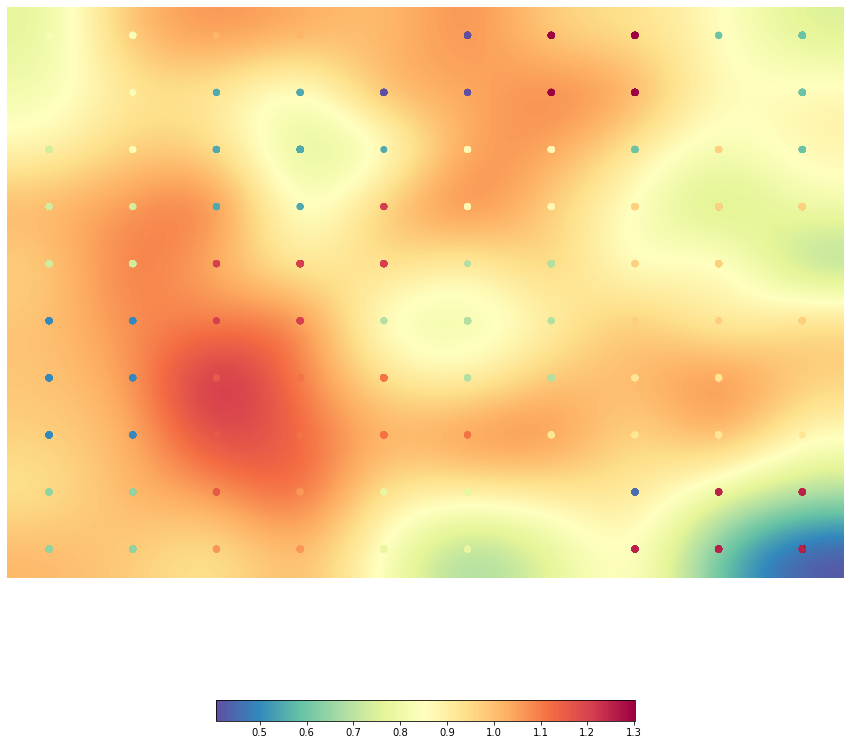

Clusters:

[[ 9  9 13 13 13  0 19 19  4  4]
 [ 9  9  3  3  0  0 19 19  4  4]
 [ 7  9  3  3  3 10 10  4 12  4]
 [ 7  7  3  3 17 10 10 12 12 12]
 [ 7  7 17 17 17  6  6 12 12 12]
 [ 2  2 17 17  6  6  6 12 12 12]
 [ 2  2 16 15 15  6  6 11 11 12]
 [ 2  2 16 15 15 15 11 11 11 11]
 [ 5  5 16 14  8  8  1  1 18 18]
 [ 5  5 14 14  8  8  8 18 18 18]] 

Clusters sorted by increasing number of neurons:
Cluster Index, Number of Neurons

[ 1  0 16 14 13 10 19  5  7  8 18 15  9 11  4  2 17  3  6 12]
[ 2  3  3  3  3  4  4  4  5  5  5  5  5  6  6  6  6  7  7 11]


In [ ]:
som.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

print("Clusters:\n")
print(som.clusters, "\n")

vals, occ = np.unique(som.clusters, return_counts = True)
sorted_indices = np.argsort(occ)

print("Clusters sorted by increasing number of neurons:")
print("Cluster Index, Number of Neurons\n")
print(vals[sorted_indices])
print(occ[sorted_indices])


#### Δοκιμή διαφορετικών παραμέτρων

Είναι εμφανές από την μορφή του umatrix παραπάνω ότι οι παράμετροι που δοκιμάσαμε για το SOM δεν επαρκούν για ικανοποιητικό αποτέλεσμα. Θέλουμε να επιτύχουμε έναν χάρτη ο οποίος θα περιέχει περισσότερες μπλε/πράσινες περιοχές τα οποία θα αποτελέσουν στη συνέχεια τα επίκεντρα των clusters που θα σχηματιστούν από την k-means, ενώ παράλληλα να διατηρεί κίτρινες/κόκκινες περιοχές οι οποίες οριοθετούν τα σύνορα ανάμεσα σε clusters. Για αυτό το σκοπό, και διατηρώντας την οδηγία να μη ξεπεράσουμε τα 100 epochs, μεταβάλλαμε τον αριθμό των νευρώνων από 10x10, δοκιμάζοντας τους συνδυασμούς 20x20, 30x30 και τέλος 35x35. Ο τελευταίος συνδυασμός ήταν ο μόνος που έδωσε ικανοποιητικά αποτελέσματα, καθώς οι προηγούμενοι δύο περιείχαν μεγάλες κόκκινες περιοχές. Αυτή η αύξηση ωστόσο δεν ήρθε χωρίς θυσίες, συγκεκριμένα σε σχέση με την αρχική εκτέλεση του SOM για 10x10 νευρώνες, η οποία διήρκησε μερικά λεπτά, η εκτέλεση με 35x35 διήρκησε σχεδόν 2 ώρες (3:38 σε CPU time). Παρόλα αυτά αυτή ήταν η μόνη τιμή η οποία έδινε ικανοποιητικά αποτελέσματα, και μπορούσαμε να έχουμε καλές ελπίδες για τα αποτελέσματα του clustering.

In [ ]:
joblib.dump(final_set, 'final_set')

['final_set']

In [ ]:
final_set = joblib.load('final_set')

In [ ]:
n_rows, n_columns = 35, 35
n_epochs = 100

labels = range(len(final_set))

som_best = somoclu.Somoclu(n_columns, n_rows, compactsupport = False)
%time som_best.train(final_set, epochs = n_epochs)

CPU times: user 3h 36min 59s, sys: 1min, total: 3h 38min
Wall time: 1h 52min 20s


In [ ]:
bmus_best = som_best.bmus
unique_bmus_best, indices_best = np.unique(bmus_best, return_inverse = True, axis = 0)

In [ ]:
joblib.dump(som_best, 'som_improved.pkl')

['som_improved.pkl']

In [ ]:
som_best = joblib.load('som_improved.pkl')

Οπτικοποιήσαμε πάλι τον U-Matrix που προέξυψε μετά από την αλλαγή του αριθμού των νευρώνων:

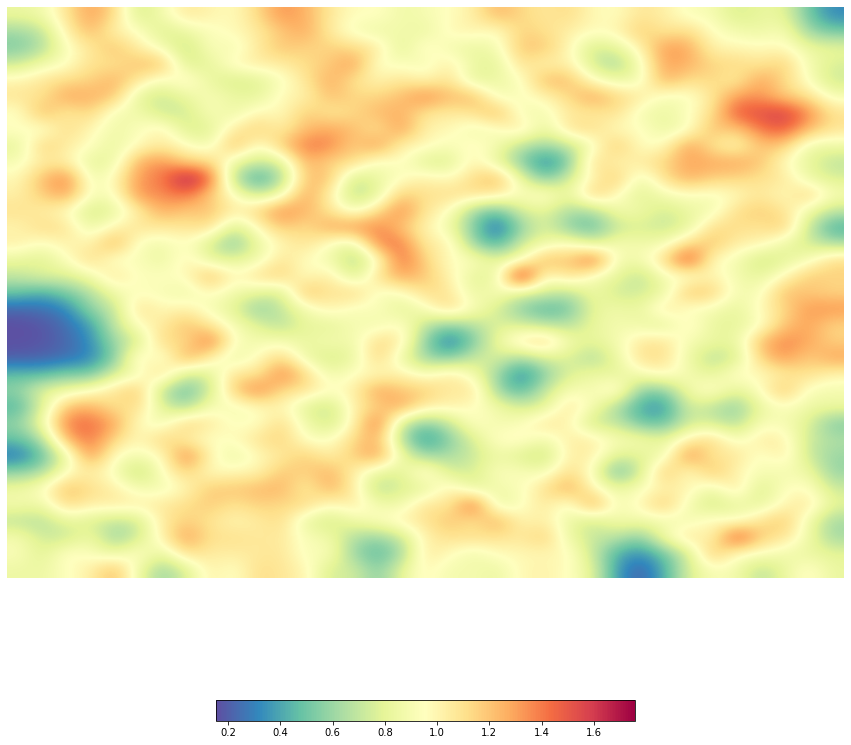

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

In [ ]:
som_best.view_umatrix(bestmatches = False, colorbar = True, figsize = (15, 15))

Εφόσον δεν υπάρχει ξεκάθαρος τρόπος επιλογής της παραμέτρου $k$ για την *k-means*, επιλέξαμε τον αριθμό $30$ με βάση μιας εκτίμησης του πόσα clusters θα έπρεπε να υπάρχουν, κοιτώντας τον παραπάνω χάρτη. Ακόμα και για αυτήν την τιμή, υπάρχουν μερικά clusters τα οποία είναι πολύ εκτεταμένα συγκριτικά με τα υπόλοιπα, ωστόσο προτιμήσαμε αυτή την τιμή σε σχέση με μεγαλύτερες διότι ήδη υπάρχουν μικρότερες συστάδες που τεμαχίζονται περαιτέρω, και δεν επιθυμούμε να φτάσουμε πολύ χαμηλά στο ελάχιστο μέγεθος συστάδας για να έχουμε καλύτερη ποιότητα συμπερασμάτων.

In [ ]:
bmus_best = som_best.bmus
unique_bmus_best, indices_best = np.unique(bmus_best, return_inverse = True, axis = 0)

n_clusters = 30
labels = [i for i in range(n_clusters)]

algorithm = KMeans(n_clusters)
som_best.cluster(algorithm = algorithm)

In [ ]:
print(bmus_best, indices_best)

[[ 7 21]
 [ 0 25]
 [22  9]
 ...
 [18  0]
 [14 15]
 [ 3 19]] [195  23 534 ... 437 357  99]


In [ ]:
from tabulate import tabulate

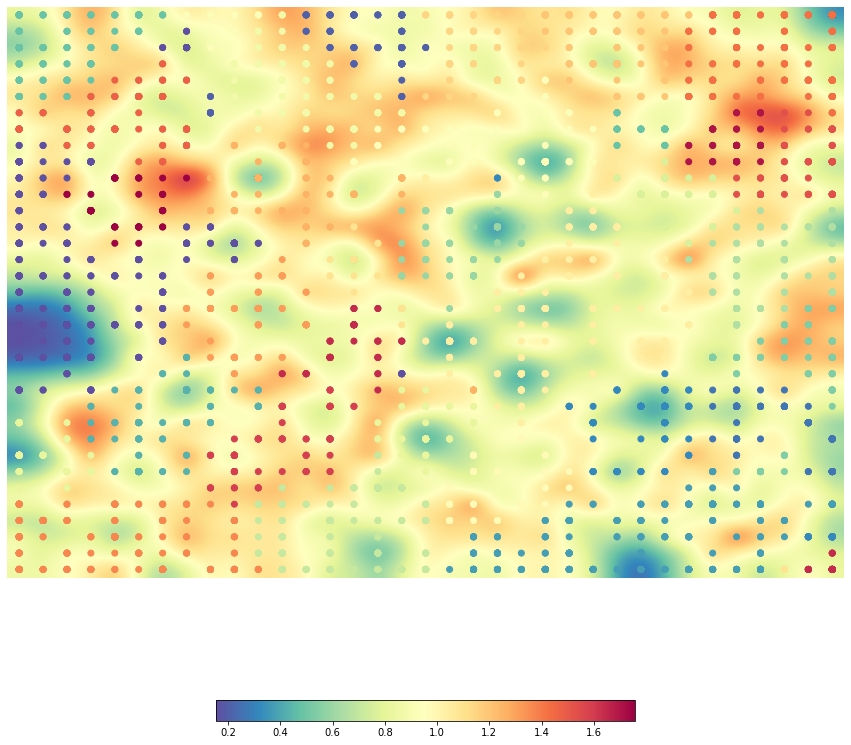

Clusters:

--  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --  --
 6   6   6   6   6   6   6  14  14  14  14  13   1   1   1   1   1  18  18  18  18  18  19  19  19  19  19  19  19  23  23  23  23  23  23
 6   6   6   6   6   6   6   0  14  14  13  13   1   1   1   1   1  18  18  18  18  18  19  19  19  19  19  19  23  23  23  23  23  23  23
 6   6   6   6   6   6   0   0  14  13  13  13  13   1   1   1   1   1  18  18  18  18  18  19  19  19  19  19  23  23  23  23  23  23  23
 6   6   6   6   6  24  24   0  13  13  13  13  13  13   1   1   1   1  18  18  18  18  19  19  19  19  19  19  23  23  23  23  23  23  23
 6   6   6   6  24  24  24  24  13  13  13  13  13  13   1   1   1  18  18  18  18  18  14  19  19  19  19  19  23  23  23  23  23  23  23
 6   6   6  24  24  24  24  24   1  13  13  13  13  13  13  13   1  18  18  18  18  14  14  14  19  19  19  19  23  23  23  23  23  23  23
24  24  24  24  

In [ ]:
som_best.view_umatrix(bestmatches = True, colorbar = True, figsize = (15, 15))

print("Clusters:\n")
print(tabulate(som_best.clusters), "\n")

vals, occ = np.unique(som_best.clusters, return_counts = True)
sorted_indices = np.argsort(occ)

print("Clusters sorted by increasing number of neurons:")

print(tabulate([vals[sorted_indices], occ[sorted_indices]], showindex=['Cluster Index', 'Number of Neurons']))

### Σημασιολογική ερμηνεία των clusters




Προκειμένου να μελετήσουμε τις τοπολογικές ιδιότητες του SOM και το αν έχουν ενσωματώσει σημασιολογική πληροφορία για τις ταινίες διαμέσου της διανυσματικής αναπαράστασης του tf-idf, των εμφυτευμάτων και των κατηγοριών, χρειαζόμαστε ένα κριτήριο ποιοτικής επισκόπησης των clusters. 

Θα υλοποιήσουμε το εξής κριτήριο: Λαμβάνουμε όρισμα έναν αριθμό (ετικέτα) cluster. Για το cluster αυτό βρίσκουμε όλους τους νευρώνες που του έχουν ανατεθεί από τον k-Means. Για όλους τους νευρώνες αυτούς βρίσκουμε όλες τις ταινίες που τους έχουν ανατεθεί (για τις οποίες αποτελούν bmus). Για όλες αυτές τις ταινίες τυπώνουμε ταξινομημένη τη συνολική στατιστική όλων των ειδών (κατηγοριών) και τις συχνότητές τους. Αν το cluster διαθέτει καλή συνοχή και εξειδίκευση, θα πρέπει κάποιες κατηγορίες να έχουν σαφώς μεγαλύτερη συχνότητα από τις υπόλοιπες. Θα μπορούμε τότε να αναθέσουμε αυτήν/ές την/τις κατηγορία/ες ως ετικέτες κινηματογραφικού είδους στο cluster.

Μπορείτε να υλοποιήσετε τη συνάρτηση αυτή όπως θέλετε. Μια πιθανή διαδικασία θα μπορούσε να είναι η ακόλουθη:

1. Ορίζουμε συνάρτηση `print_categories_stats` που δέχεται ως είσοδο λίστα με ids ταινιών. Δημιουργούμε μια κενή λίστα συνολικών κατηγοριών. Στη συνέχεια, για κάθε ταινία επεξεργαζόμαστε το string `categories` ως εξής: δημιουργούμε μια λίστα διαχωρίζοντας το string κατάλληλα με την `split` και αφαιρούμε τα whitespaces μεταξύ ετικετών με την `strip`. Προσθέτουμε τη λίστα αυτή στη συνολική λίστα κατηγοριών με την `extend`. Τέλος χρησιμοποιούμε πάλι την `np.unique` για να μετρήσουμε συχνότητα μοναδικών ετικετών κατηγοριών και ταξινομούμε με την `np.argsort`. Τυπώνουμε τις κατηγορίες και τις συχνότητες εμφάνισης ταξινομημένα. Χρήσιμες μπορεί να σας φανούν και οι `np.ravel`, `np.nditer`, `np.array2string` και `zip`.

2. Ορίζουμε τη βασική μας συνάρτηση `print_cluster_neurons_movies_report` που δέχεται ως όρισμα τον αριθμό ενός cluster. Με τη χρήση της `np.where` μπορούμε να βρούμε τις συντεταγμένες των bmus που αντιστοιχούν στο cluster και με την `column_stack` να φτιάξουμε έναν πίνακα bmus για το cluster. Προσοχή στη σειρά (στήλη - σειρά) στον πίνακα bmus. Για κάθε bmu αυτού του πίνακα ελέγχουμε αν υπάρχει στον πίνακα μοναδικών bmus που έχουμε υπολογίσει στην αρχή συνολικά και αν ναι προσθέτουμε το αντίστοιχο index του νευρώνα σε μια λίστα. Χρήσιμες μπορεί να είναι και οι `np.rollaxis`, `np.append`, `np.asscalar`. Επίσης πιθανώς να πρέπει να υλοποιήσετε ένα κριτήριο ομοιότητας μεταξύ ενός bmu και ενός μοναδικού bmu από τον αρχικό πίνακα bmus.

3. Υλοποιούμε μια βοηθητική συνάρτηση `neuron_movies_report`. Λαμβάνει ένα σύνολο νευρώνων από την `print_cluster_neurons_movies_report` και μέσω της `indices` φτιάχνει μια λίστα με το σύνολο ταινιών που ανήκουν σε αυτούς τους νευρώνες. Στο τέλος καλεί με αυτή τη λίστα την `print_categories_stats` που τυπώνει τις στατιστικές των κατηγοριών.

Μπορείτε βέβαια να προσθέσετε οποιαδήποτε επιπλέον έξοδο σας βοηθάει. Μια χρήσιμη έξοδος είναι πόσοι νευρώνες ανήκουν στο cluster και σε πόσους και ποιους από αυτούς έχουν ανατεθεί ταινίες.

Θα επιτελούμε τη σημασιολογική ερμηνεία του χάρτη καλώντας την `print_cluster_neurons_movies_report` με τον αριθμός ενός cluster που μας ενδιαφέρει. 

Παράδειγμα εξόδου για ένα cluster (μη βελτιστοποιημένος χάρτης, ωστόσο βλέπετε ότι οι μεγάλες κατηγορίες έχουν σημασιολογική  συνάφεια):

```
Overall Cluster Genres stats:  
[('"Horror"', 86), ('"Science Fiction"', 24), ('"B-movie"', 16), ('"Monster movie"', 10), ('"Creature Film"', 10), ('"Indie"', 9), ('"Zombie Film"', 9), ('"Slasher"', 8), ('"World cinema"', 8), ('"Sci-Fi Horror"', 7), ('"Natural horror films"', 6), ('"Supernatural"', 6), ('"Thriller"', 6), ('"Cult"', 5), ('"Black-and-white"', 5), ('"Japanese Movies"', 4), ('"Short Film"', 3), ('"Drama"', 3), ('"Psychological thriller"', 3), ('"Crime Fiction"', 3), ('"Monster"', 3), ('"Comedy"', 2), ('"Western"', 2), ('"Horror Comedy"', 2), ('"Archaeology"', 2), ('"Alien Film"', 2), ('"Teen"', 2), ('"Mystery"', 2), ('"Adventure"', 2), ('"Comedy film"', 2), ('"Combat Films"', 1), ('"Chinese Movies"', 1), ('"Action/Adventure"', 1), ('"Gothic Film"', 1), ('"Costume drama"', 1), ('"Disaster"', 1), ('"Docudrama"', 1), ('"Film adaptation"', 1), ('"Film noir"', 1), ('"Parody"', 1), ('"Period piece"', 1), ('"Action"', 1)]```
   

In [ ]:
def print_categories_stats(id_list):
  categories_list = []

  for movie in id_list:
    categs = categories[movie][0]

    movie_categories = categs.split(",")
    movie_categories = [movie.strip() for movie in movie_categories]
    
    categories_list.extend(movie_categories)

  vals, occ = np.unique(categories_list, return_counts = True)
  percentages = np.array(occ/len(id_list), dtype=np.float32)
  sorted_indices = np.argsort(occ)

  result = list(zip(vals[sorted_indices], occ[sorted_indices], percentages[sorted_indices]))
  
  return list(reversed(result))
  #return sorted(result, reverse = True, key = lambda elem : elem[1])

Για την συνάρτηση `print_categories_stats` θεωρήσαμε σκόπιμο να συμπεριλάβουμε στην έξοδο για κάθε κατηγορία και το ποσοστό των ταινιών που την κατέχουν, εκτός από τον αριθμό, καθώς φαίνεται πιο χρήσιμο για την εξαγωγή των συμπερασμάτων, δεδομένου ότι δεν έχουμε ομοιομορφία στο μέγεθος των clusters.

In [ ]:
def print_cluster_neurons_movies_report(cluster_no, clusters, unique_bmus):
  cluster_array = np.where(clusters == cluster_no)
  stack = np.column_stack(cluster_array)
  result = [bmu for bmu in stack if bmu in unique_bmus]

  return result

In [ ]:
indices = indices_best
unique_bmus = unique_bmus_best

def neuron_movies_report(neurons):
  movies = np.array([], dtype=int)
  for neuron in neurons:
    index = np.where((unique_bmus == neuron).all(axis=1))[0]
    if(index.shape[0] > 0):
      ids = np.where(indices == index)[0]
      movies = np.concatenate((movies, ids))
  return movies

Κάναμε μια αναδιάταξη στον προτεινόμενο τρόπο σύνταξης των συναρτήσεων `print_cluster_neurons_movies_report` και `neuron_movies_report`, επιλέξαμε να μη κάνουμε καμία από τις 3 να καλεί την άλλη, και αντί αυτού η καθεμία να δέχεται ως παράμετρο το αποτέλεσμα της προηγούμενης. Ενσωματώσαμε και τις 3 σε μία συνάρτηση, την `clustering_analysis` η οποία θα παράγει μία φορά τα στατιστικά για όλο το χάρτη, και θα έχουμε πρόσβαση σε αυτά διατρέχοντας το αποτέλεσμα. Ορίζουμε μια βοηθητική συνάρτηση, την `subanalysis` η οποία μπορεί να τυπώσει με ευανάγνωστο τρόπο το αποτέλεσμα της `clustering_analysis`, και με την επιλογή να έχουμε είτε αναλυτικό αποτέλεσμα, το οποίο δεν είναι ιδιαίτερα χρήσιμο γιατί σε κάθε cluster έχουμε πάρα πολλές κατηγορίες που χαρακτηρίζουν μόνο μία ταινία και συμπεριλαμβάνεται μόνο για λόγους πληρότητας, είτε να τυπώνει τις 5 κορυφαίες κατηγορίες ανά cluster, το οποίο θα φανεί πιο χρήσιμο στην σημασιολογική ερμηνεία.

In [ ]:
neuron_list = print_cluster_neurons_movies_report(5, som_best.clusters, unique_bmus)

movie_list = neuron_movies_report(neuron_list)

print_categories_stats(movie_list)

[('"Thriller"', 85, 0.74561405),
 ('"Horror"', 62, 0.54385966),
 ('"World cinema"', 52, 0.45614034),
 ('"Psychological thriller"', 21, 0.18421052),
 ('"Bollywood"', 15, 0.13157895),
 ('"Indie"', 9, 0.078947365),
 ('"Musical"', 8, 0.07017544),
 ('"Drama"', 7, 0.06140351),
 ('"Suspense"', 6, 0.05263158),
 ('"Supernatural"', 6, 0.05263158),
 ('"Chinese Movies"', 6, 0.05263158),
 ('"Japanese Movies"', 6, 0.05263158),
 ('"Spy"', 4, 0.03508772),
 ('"Science Fiction"', 4, 0.03508772),
 ('"Crime Thriller"', 4, 0.03508772),
 ('"Black-and-white"', 4, 0.03508772),
 ('"Film noir"', 4, 0.03508772),
 ('"Fantasy"', 3, 0.02631579),
 ('"Action/Adventure"', 3, 0.02631579),
 ('"Cult"', 2, 0.01754386),
 ('"Comedy"', 2, 0.01754386),
 ('"Zombie Film"', 2, 0.01754386),
 ('"Television movie"', 2, 0.01754386),
 ('"Teen"', 2, 0.01754386),
 ('"Romance Film"', 2, 0.01754386),
 ('"Martial Arts Film"', 1, 0.00877193),
 ('"Crime Fiction"', 1, 0.00877193),
 ('"Avant-garde"', 1, 0.00877193),
 ('"B-movie"', 1, 0.008771

In [ ]:
def clustering_analysis(som, unique_bmus, indices, top5=False):
  clusters = som.clusters

  report = []
  
  for cluster in np.unique(clusters):
    neuron_list = print_cluster_neurons_movies_report(cluster, clusters, unique_bmus)

    movie_list = neuron_movies_report(neuron_list)

    result = print_categories_stats(movie_list)

    if top5:
      result = result[:5]

    report.append((len(movie_list), result))
  
  return report

#### Συνοπτική Παρουσίαση

In [ ]:
def subanalysis(analysis, indexs=None):
  if indexs is None:
    indexs = range(len(analysis))
  for i in indexs:
    size = analysis[i][0]
    table = analysis[i][1]

    print('      Cluster #' + str(i) + ' (size = ' + str(size) + ')\n')
    print(tabulate(table, headers=['Category', 'Movies', 'Percentage'], tablefmt='github', showindex=''))
    print('==============================================================================\n')

In [ ]:
analysis = clustering_analysis(som_best, unique_bmus_best, indices_best, True)

In [ ]:
subanalysis(analysis)

      Cluster #0 (size = 369)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Thriller"         |      345 |     0.934959 |
| "Action"           |      231 |     0.626016 |
| "Action/Adventure" |      181 |     0.490515 |
| "Crime Fiction"    |      152 |     0.411924 |
| "Drama"            |      140 |     0.379404 |

      Cluster #1 (size = 111)

| Category            |   Movies |   Percentage |
|---------------------|----------|--------------|
| "Drama"             |      111 |     1        |
| "Television movie"  |       21 |     0.189189 |
| "Biographical film" |       21 |     0.189189 |
| "Biography"         |       19 |     0.171171 |
| "Biopic [feature]"  |       18 |     0.162162 |

      Cluster #2 (size = 168)

| Category        |   Movies |   Percentage |
|-----------------|----------|--------------|
| "Comedy"        |      168 |    1         |
| "World cinema"  |       16 |    0.0952381 |
| "Slapstick"     |        7

#### Αναλυτική Παρουσίαση

In [ ]:
analysis = clustering_analysis(som_best, unique_bmus_best, indices_best)

In [ ]:
subanalysis(analysis)

      Cluster #0 (size = 369)

| Category                                   |   Movies |   Percentage |
|--------------------------------------------|----------|--------------|
| "Thriller"                                 |      345 |   0.934959   |
| "Action"                                   |      231 |   0.626016   |
| "Action/Adventure"                         |      181 |   0.490515   |
| "Crime Fiction"                            |      152 |   0.411924   |
| "Drama"                                    |      140 |   0.379404   |
| "Mystery"                                  |       96 |   0.260163   |
| "Crime Thriller"                           |       90 |   0.243902   |
| "Science Fiction"                          |       59 |   0.159892   |
| "Adventure"                                |       59 |   0.159892   |
| "Horror"                                   |       54 |   0.146341   |
| "Action Thrillers"                         |       45 |   0.121951   |
| "Psychological thr

### Tips για το SOM και το clustering




- Για την ομαδοποίηση ένα U-matrix καλό είναι να εμφανίζει και μπλε-πράσινες περιοχές (clusters) και κόκκινες περιοχές (ορίων). Παρατηρήστε ποια σχέση υπάρχει μεταξύ αριθμού ταινιών στο final set, μεγέθους grid και ποιότητας U-matrix.
- Για το k του k-Means προσπαθήστε να προσεγγίζει σχετικά τα clusters του U-matrix (όπως είπαμε είναι διαφορετικοί μέθοδοι clustering). Μικρός αριθμός k δεν θα σέβεται τα όρια. Μεγάλος αριθμός θα δημιουργεί υπο-clusters εντός των clusters που φαίνονται στο U-matrix. Το τελευταίο δεν είναι απαραίτητα κακό, αλλά μεγαλώνει τον αριθμό clusters που πρέπει να αναλυθούν σημασιολογικά.
- Σε μικρούς χάρτες και με μικρά final sets δοκιμάστε διαφορετικές παραμέτρους για την εκπαίδευση του SOM. Σημειώστε τυχόν παραμέτρους που επηρεάζουν την ποιότητα του clustering για το dataset σας ώστε να τις εφαρμόσετε στους μεγάλους χάρτες.
- Κάποια τοπολογικά χαρακτηριστικά εμφανίζονται ήδη σε μικρούς χάρτες. Κάποια άλλα χρειάζονται μεγαλύτερους χάρτες. Δοκιμάστε μεγέθη 20x20, 25x25 ή και 30x30 και αντίστοιχη προσαρμογή των k. Όσο μεγαλώνουν οι χάρτες, μεγαλώνει η ανάλυση του χάρτη αλλά μεγαλώνει και ο αριθμός clusters που πρέπει να αναλυθούν.


### Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM





Μετά το πέρας της εκπαίδευσης και του clustering θα έχετε ένα χάρτη με τοπολογικές ιδιότητες ως προς τα είδη των ταίνιών της συλλογής σας, κάτι αντίστοιχο με την εικόνα στην αρχή της Εφαρμογής 2 αυτού του notebook. Η συγκεκριμένη εικόνα είναι μόνο για εικονογράφιση, δεν είναι χάρτης SOM καιδεν έχει καμία σχέση με τη συλλογή δεδομένων και τις κατηγορίες μας.

Για τον τελικό χάρτη SOM που θα παράξετε για τη συλλογή σας, αναλύστε σε markdown με συγκεκριμένη αναφορά σε αριθμούς clusters και τη σημασιολογική ερμηνεία τους τις εξής τρεις τοπολογικές ιδιότητες του SOM: 

1. Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.
2. Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.
3. Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

Προφανώς τοποθέτηση σε 2 διαστάσεις που να σέβεται μια απόλυτη τοπολογία δεν είναι εφικτή, αφενός γιατί δεν υπάρχει κάποια απόλυτη εξ ορισμού για τα κινηματογραφικά είδη ακόμα και σε πολλές διαστάσεις, αφετέρου γιατί πραγματοποιούμε μείωση διαστατικότητας.

Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά. Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.


Τέλος, εντοπίστε clusters που έχουν κατά την άποψή σας ιδιαίτερο ενδιαφέρον στη συλλογή της ομάδας σας (data exploration / discovery value) και σχολιάστε.


#### **1.** Δεδομένα που έχουν μεγαλύτερη πυκνότητα πιθανότητας στο χώρο εισόδου τείνουν να απεικονίζονται με περισσότερους νευρώνες στο χώρο μειωμένης διαστατικότητας. Δώστε παραδείγματα από συχνές και λιγότερο συχνές κατηγορίες ταινιών. Χρησιμοποιήστε τις στατιστικές των κατηγοριών στη συλλογή σας και τον αριθμό κόμβων που χαρακτηρίζουν.

In [ ]:
category_frequencies = print_categories_stats(range(len(final_set))) #Αντιμετωπίζουμε όλες τις ταινίες σαν ένα μεγάλο cluster και βρίσκουμε τις συχνότητες των κατηγοριών


most_common = category_frequencies[:3]
print("Most Frequent Categories:")
print(most_common)

least_common = category_frequencies[32:35]
print("\nLeast Frequent Categories:")
print(least_common)

Most Frequent Categories:
[('"Drama"', 2221, 0.4442), ('"Comedy"', 1249, 0.2498), ('"Romance Film"', 792, 0.1584)]

Least Frequent Categories:
[('"Film adaptation"', 128, 0.0256), ('"Chinese Movies"', 124, 0.0248), ('"Black comedy"', 99, 0.0198)]


In [ ]:
clusters_with_category = {}

lst = list(most_common)
lst.extend(least_common)

for x in [tup[0] for tup in lst]:
  clusters_with_category[x] = 0

analysis = clustering_analysis(som_best, unique_bmus_best, indices_best, True)
  
for x in analysis:
  categs = [tup[0] for tup in x[1]]
  
  for categ in clusters_with_category:
    if categ in categs:
      clusters_with_category[categ] = clusters_with_category[categ] + 1

In [ ]:
print("Most Frequent Categories:")
print(most_common)

print("\nLeast Frequent Categories:")
print(least_common)

print()
print(clusters_with_category)
print("Total amount of categories:", len(category_frequencies))

Most Frequent Categories:
[('"Drama"', 2221, 0.4442), ('"Comedy"', 1249, 0.2498), ('"Romance Film"', 792, 0.1584)]

Least Frequent Categories:
[('"Film adaptation"', 128, 0.0256), ('"Chinese Movies"', 124, 0.0248), ('"Black comedy"', 99, 0.0198)]

{'"Drama"': 17, '"Comedy"': 15, '"Romance Film"': 6, '"Film adaptation"': 0, '"Chinese Movies"': 0, '"Black comedy"': 2}
Total amount of categories: 263


Θα θεωρήσουμε ότι μια κατηγορία *χαρακτηρίζει* έναν κόμβο(cluster), όταν βρίσκεται στις 5 πιο συχνές κατηγορίες των ταινιών που της ανήκουν. Βλέπουμε ότι για τις 3 πιο πιθανές ο αριθμός αυτών των κόμβων φθίνει πολύ απότομα. Η κατηγορία του δράματος, μακράν η πιο συχνή στο dataset μας, χαρακτηρίζει πάνω από τους μισούς κόμβους, και αμέσως μετά βρίσκεται η κατηγορία της κωμωδίας, με ελαφρώς λιγότερους κόμβους, αλλά και πάλι πάνω από διπλάσιους σε σχέση με την επόμενη κατηγορία.

Για να επιδείξουμε το ανάποδο, ότι δηλαδή οι κατηγορίες με μικρότερη συχνότητα χαρακτηρίζουν λιγότερους κόμβους, αρχικά επιλέξαμε τις 3 λιγότερο συχνές κατηγορίες, ωστόσο ήταν φανερό ότι τα αποτελέσματα δεν ήταν ιδιαίτερα ενδιαφέροντα, υπάρχει πολύ μεγάλος αριθμός κατηγοριών που ανήκουν σε ελάχιστες ταινίες, και αδυνατόν να χαρακτηρίσουν έστω και έναν κόμβο. Αρκεί όμως να δούμε μέχρι την 35η ταινία και ήδη βλέπουμε ταινίες που δεν χαρακτηρίζουν κανέναν κόμβο. Η σχέση ανάμεσα στην συχνότητα της κάθε κατηγορίας και στον αριθμό των κόμβων που χαρακτηρίζει φαίνεται να είναι πραγματική, αλλά όχι αυστηρή. Υπάρχουν κατηγορίες που χαρακτηρίζουν περισσότερους κόμβους σε σχέση με άλλες που έχουν μεγαλύτερη συχνότητα, αν και αυτό προκύπτει κυρίως στις λιγότερο συχνές κατηγορίες που κυμαίνονται ανάμεσα σε πολύ χαμηλές τιμές κόμβων.

#### **2.** Μακρινά πρότυπα εισόδου τείνουν να απεικονίζονται απομακρυσμένα στο χάρτη. Υπάρχουν χαρακτηριστικές κατηγορίες ταινιών που ήδη από μικρούς χάρτες τείνουν να τοποθετούνται σε διαφορετικά ή απομονωμένα σημεία του χάρτη.

In [ ]:
subanalysis(analysis, [22,23])

      Cluster #22 (size = 323)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Horror"           |      248 |     0.767802 |
| "Action/Adventure" |       85 |     0.263158 |
| "Action"           |       81 |     0.250774 |
| "Science Fiction"  |       75 |     0.232198 |
| "Comedy"           |       72 |     0.22291  |

      Cluster #23 (size = 250)

| Category         |   Movies |   Percentage |
|------------------|----------|--------------|
| "Drama"          |      250 |        1     |
| "Romance Film"   |      248 |        0.992 |
| "Romantic drama" |      192 |        0.768 |
| "World cinema"   |       94 |        0.376 |
| "Musical"        |       46 |        0.184 |



Συγκρίνοντας τα clusters με αριθμούς #22 και #23, βλέπουμε πολύ έντονα την θεματική αντίθεση. Η συστάδα #22, τοποθετημένη στα κάτω αριστερά του χάρτη, απαρτίζεται από ταινίες τρόμου και περιπέτειας, ενώ η συστάδα #23, που βρίσκεται στην απέναντι γωνία, αποτελείται από ρομαντικά δράματα. 



In [ ]:
subanalysis(analysis, [1, 10])

      Cluster #1 (size = 111)

| Category            |   Movies |   Percentage |
|---------------------|----------|--------------|
| "Drama"             |      111 |     1        |
| "Television movie"  |       21 |     0.189189 |
| "Biographical film" |       21 |     0.189189 |
| "Biography"         |       19 |     0.171171 |
| "Biopic [feature]"  |       18 |     0.162162 |

      Cluster #10 (size = 223)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Action"           |      202 |     0.90583  |
| "Adventure"        |      107 |     0.479821 |
| "Science Fiction"  |       56 |     0.251121 |
| "Action/Adventure" |       49 |     0.219731 |
| "Western"          |       30 |     0.134529 |



Μπορούμε να δούμε επίσης την αντίθεση ανάμεσα στη θεματική ενότητα των ταινιών της συστάδας #1 στην κορυφή του χάρτη, με την συστάδα #10 στον πάτο. Η πρώτη έχει ταινίες δράματος και ένα σημαντικό ποσοστό φαίνεται να είναι βιογραφικές, ενώ στον αντίποδα βλέπουμε ταινίες δράσης και περιπέτειας.

#### **3.** Κοντινά πρότυπα εισόδου τείνουν να απεικονίζονται κοντά στο χάρτη. Σε μεγάλους χάρτες εντοπίστε είδη ταινιών και κοντινά τους υποείδη.

In [ ]:
subanalysis(analysis, [0, 24, 29])

      Cluster #0 (size = 369)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Thriller"         |      345 |     0.934959 |
| "Action"           |      231 |     0.626016 |
| "Action/Adventure" |      181 |     0.490515 |
| "Crime Fiction"    |      152 |     0.411924 |
| "Drama"            |      140 |     0.379404 |

      Cluster #24 (size = 136)

| Category        |   Movies |   Percentage |
|-----------------|----------|--------------|
| "Drama"         |      136 |     1        |
| "Action"        |       88 |     0.647059 |
| "Thriller"      |       67 |     0.492647 |
| "Crime Fiction" |       37 |     0.272059 |
| "Adventure"     |       20 |     0.147059 |

      Cluster #29 (size = 65)

| Category         |   Movies |   Percentage |
|------------------|----------|--------------|
| "Thriller"       |       65 |     1        |
| "Crime Fiction"  |       64 |     0.984615 |
| "Drama"          |       64 |     0.984615 |
| "C

Στο αριστερό μέρος του χάρτη βρίσκουμε μια αρκετά εκτεταμένη συστάδα, την #0, η οποία συνορεύει με την #24, και μαζί περιβάλλουν σχεδόν ολοκληρωτικά την συστάδα #29. Από την παραπάνω ανάλυση βλέπουμε ότι πρόκειται για συστάδες γειτονικές όχι μόνο τοπολογικά αλλά και θεματολογικά. Και οι 3 περιέχουν ταινίες θρίλερ και φαντασία εγκλήματος, ενώ ειδικότερα το ζευγάρι #0 και #24 έχει και μια τάση προς τις ταινίες δράσης.

In [ ]:
subanalysis(analysis, [9, 11, 25])

      Cluster #6 (size = 224)

| Category       |   Movies |   Percentage |
|----------------|----------|--------------|
| "Drama"        |      224 |     1        |
| "World cinema" |      207 |     0.924107 |
| "Comedy"       |       35 |     0.15625  |
| "Thriller"     |       32 |     0.142857 |
| "Bollywood"    |       28 |     0.125    |

      Cluster #9 (size = 170)

| Category          |   Movies |   Percentage |
|-------------------|----------|--------------|
| "Comedy"          |      170 |     1        |
| "Romance Film"    |      155 |     0.911765 |
| "Romantic comedy" |      121 |     0.711765 |
| "Musical"         |       31 |     0.182353 |
| "Black-and-white" |       28 |     0.164706 |

      Cluster #11 (size = 45)

| Category       |   Movies |   Percentage |
|----------------|----------|--------------|
| "Comedy"       |       45 |     1        |
| "Comedy-drama" |       43 |     0.955556 |
| "Drama"        |       34 |     0.755556 |
| "Indie"        |       19 |

Δε χρειάζεται να περιοριζόμαστε όμως στις άκρες του χάρτη. Αν μεταφερθούμε στο κέντρο και εξετάσουμε την τριάδα #9, #11, #25 βλέπουμε μια πολύ ξεκάθαρη συγγένεια. Πρόκειται για συστάδες στις οποίες όλες οι ταινίες έχουν την κατηγορία της κωμωδίας. Με τις συστάδες #9 και #25 να εξειδικεύονται στις ρομαντικές κωμωδίες, ενώ η #11 στα κωμικά δράματα.

#### **4.**Εντοπίστε μεγάλα clusters και μικρά clusters που δεν έχουν σαφή χαρακτηριστικά.

In [ ]:
subanalysis(analysis, [16])

      Cluster #16 (size = 347)

| Category       |   Movies |   Percentage |
|----------------|----------|--------------|
| "Comedy film"  |       92 |     0.26513  |
| "Romance Film" |       91 |     0.262248 |
| "Silent film"  |       67 |     0.193084 |
| "Drama"        |       55 |     0.158501 |
| "Comedy"       |       43 |     0.123919 |



Ένα από τα μεγάλα clusters που δεν έχουν σαφή χαρακτηριστικά είναι το #16. Αποτελείται από 347 ταινίες, και ενώ οι 5 πιο συχνές κατηγορίες του έχουν συνοχή μεταξύ τους, σκιαγραφίζοντας μία συστάδα που αποτελείται από (εν μέρει βουβό) κινηματογράφο με ρομαντικές κωμωδίες, στην πραγματικότητα βλέπουμε ότι ακόμα και η πιο συχνή κατηγορία της συστάδας, η κωμωδία, βρίσκεται μόλις στο $27\%$ των ταινιών, το ίδιο και η κατηγορίας της ρομαντικής ταινίας. Συνεπώς δε θα μπορούσαμε να χαρακτηρίσουμε την συστάδα με καμία από αυτές τις κατηγορίες, όταν σχεδόν τα $3/4$ των ταινιών που την απαρτίζουν δεν ανήκουν σε αυτή την κατηγορία. Η συνένωση τόσων ταινιών σε αυτή την συστάδα μπορεί αν υποδεινύει ότι υπάρχει μια ομοιότητα μεταξύ τους που δε βρίσκεται στις κατηγορίες, αλλά στην περιγραφή τους, εξάλλου δεν είναι οι κατηγορίες ο μόνος παράγοντας με τον οποίο χωρίζουμε τις ταινίες.

In [ ]:
subanalysis(analysis, [15])

      Cluster #15 (size = 86)

| Category            |   Movies |   Percentage |
|---------------------|----------|--------------|
| "Adventure"         |       30 |     0.348837 |
| "Animation"         |       30 |     0.348837 |
| "Fantasy"           |       15 |     0.174419 |
| "Short Film"        |       11 |     0.127907 |
| "Children's/Family" |       11 |     0.127907 |



Για τον ίδιο λόγο με παραπάνω μπορούμε να εντοπίσουμε και μία σχετικά μικρή συστάδα η οποία να μην έχει σαφή χαρακτηριστικά. Είναι ξεκάθαρο ότι οι κύριες κατηγορίες ταιριάζουν μεταξύ τους, και περιγράφουν παιδικές animated ταινίες, ωστόσο για ακόμα μια φορά θα διστάζαμε να χαρακτηρίσουμε μία ολόκληρη συστάδα με αυτό τον τρόπο όταν τα $2/3$ των ταινιών που την απαρτίζουν δεν ανήκουν στην κατηγορία αυτή. Για ακόμα μια φορά θα πρέπει αν υποθέσουμε ότι η ομοιότητα ανάμεσα στις ταινίες εντοπίζεται κάπου αλλού, και όχι στις κατηγορίες τους.

**5.** Εντοπίστε clusters συγκεκριμένων ειδών που μοιάζουν να μην έχουν τοπολογική συνάφεια με γύρω περιοχές. Προτείνετε πιθανές ερμηνείες.

In [ ]:
subanalysis(analysis, [12, 10, 15, 16, 26, 27])

      Cluster #12 (size = 160)

| Category                 |   Movies |   Percentage |
|--------------------------|----------|--------------|
| "Horror"                 |       86 |      0.5375  |
| "Thriller"               |       63 |      0.39375 |
| "Slasher"                |       44 |      0.275   |
| "Supernatural"           |       35 |      0.21875 |
| "Psychological thriller" |       33 |      0.20625 |

      Cluster #10 (size = 223)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Action"           |      202 |     0.90583  |
| "Adventure"        |      107 |     0.479821 |
| "Science Fiction"  |       56 |     0.251121 |
| "Action/Adventure" |       49 |     0.219731 |
| "Western"          |       30 |     0.134529 |

      Cluster #15 (size = 86)

| Category            |   Movies |   Percentage |
|---------------------|----------|--------------|
| "Adventure"         |       30 |     0.348837 |
| "Animation"         |  

Εξετάζοντας την συστάδα #12 και την άμεση γειτονιά της που αποτελείται από τις συστάδες #10, #15, #16, #26 και #27. Η συστάδα #12 αποτελείται από ταινίες Horror, Thriller, Slasher,  Supernatural και Psychological Thriller. **Καμία** από τις γειτονικές ταινίες δεν περιέχει αυτές τις κατηγορίες στις κορυφαίες 5 κατηγορίες της.

Αν κοιτάξουμε τη λίστα με τη συνοπτική παρουσίαση των συστάδων, βλέπουμε ότι οι μόνες άλλες που έχουν Horror στις κορυφαίες κατηγορίες τους είναι η #5 και η #22. Τοπολογικά αυτές οι δύο είναι γείτονες, και η απόσταση τους με την #12 είναι σχετικά μικρή. Παρεμβάλλεται ωστόσο ανάμεσά τους η συστάδα #10 και #26 από τη γειτονιά της #12. Παρακάτω βλέπουμε τις αναλύσεις για τις αντίστοιχες περιοχές. Μια πιθανή ερμηνεία για αυτό τον τοπολογικό διαχωρισμό είναι η ομοιότητα του cluster #22 με τους #10 και #26. Ο #22 μπορεί να έχει Horror ως κορυφαία κατηγορία, αλλά είναι έχει και σε ένα βαθμό ταινίες δράσης και περιπέτειας, οι οποίες ανήκουν και στις κορυφαίες κατηγορίες των #10 και #26. Αυτό σε συνδυασμό με ενδεχόμενες παρόμοιες λέξεις κλειδιά στις περιγραφές των ταινιών, μπορεί να καθέστησε τις αντίστοιχες συστάδες πιο όμοιες (και συνεπώς κοντινές) και να οδήγησε σε αυτό τον τοπολογικό διαχωρισμό ανάμεσα στο #5, #22 και στο #12.

####Ανάλυση cluster #12:
---

In [ ]:
subanalysis(analysis, [12])

      Cluster #12 (size = 160)

| Category                 |   Movies |   Percentage |
|--------------------------|----------|--------------|
| "Horror"                 |       86 |      0.5375  |
| "Thriller"               |       63 |      0.39375 |
| "Slasher"                |       44 |      0.275   |
| "Supernatural"           |       35 |      0.21875 |
| "Psychological thriller" |       33 |      0.20625 |



####Ανάλυση cluster #10 και #26:
---

In [ ]:
subanalysis(analysis, [10, 26])

      Cluster #10 (size = 223)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Action"           |      202 |     0.90583  |
| "Adventure"        |      107 |     0.479821 |
| "Science Fiction"  |       56 |     0.251121 |
| "Action/Adventure" |       49 |     0.219731 |
| "Western"          |       30 |     0.134529 |

      Cluster #26 (size = 114)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Western"          |       56 |     0.491228 |
| "Action/Adventure" |       56 |     0.491228 |
| "Japanese Movies"  |       34 |     0.298246 |
| "Action"           |       19 |     0.166667 |
| "Drama"            |       16 |     0.140351 |



####Ανάλυση cluster #5 και #22:
---

In [ ]:
subanalysis(analysis, [5, 22])

      Cluster #5 (size = 114)

| Category                 |   Movies |   Percentage |
|--------------------------|----------|--------------|
| "Thriller"               |       85 |     0.745614 |
| "Horror"                 |       62 |     0.54386  |
| "World cinema"           |       52 |     0.45614  |
| "Psychological thriller" |       21 |     0.184211 |
| "Bollywood"              |       15 |     0.131579 |

      Cluster #22 (size = 323)

| Category           |   Movies |   Percentage |
|--------------------|----------|--------------|
| "Horror"           |      248 |     0.767802 |
| "Action/Adventure" |       85 |     0.263158 |
| "Action"           |       81 |     0.250774 |
| "Science Fiction"  |       75 |     0.232198 |
| "Comedy"           |       72 |     0.22291  |




# Τελική παράδοση άσκησης

- Θα παραδώσετε στο helios το παρόν notebook επεξεργασμένο ή ένα ή δύο νέα zipαρισμένα με τις απαντήσεις σας για τα ζητούμενα και των δύο εφαρμογών. 
- Θυμηθείτε ότι η ανάλυση του χάρτη στο markdown με αναφορά σε αριθμούς clusters πρέπει να αναφέρεται στον τελικό χάρτη με τα κελιά ορατά που θα παραδώσετε αλλιώς ο χάρτης που θα προκύψει θα είναι διαφορετικός και τα labels των clusters δεν θα αντιστοιχούν στην ανάλυσή σας. 
- Μην ξεχάσετε στην αρχή ένα κελί markdown με **τα στοιχεία της ομάδας σας**.

<table>
  <tr><td align="center">
    <font size="4">Παρακαλούμε διατρέξτε βήμα-βήμα το notebook για να μην ξεχάσετε παραδοτέα</font>
</td>
  </tr>
</table>

# Βιβλιογραφία

* [Names.txt](https://www.usna.edu/Users/cs/roche/courses/s15si335/proj1/files.php%3Ff=names.txt.html)
* [NLP for beginners](https://becominghuman.ai/nlp-for-beginners-using-nltk-f58ec22005cd)
* [Word Embeddings with Gensim](https://machinelearningmastery.com/develop-word-embeddings-python-gensim/)
* [Word2vec with gensim library](https://stackabuse.com/implementing-word2vec-with-gensim-library-in-python/)
* [Gensim models](https://github.com/RaRe-Technologies/gensim-data)